# Discover the factors that affect employee attrition

### Project Description:
In a work environment, Employee Attrition describes an unanticipated attrition of the workforce. The causes of this decline are all unavoidable reasons such as retirement, resignation, employee loss of work capacity or sudden death. Companies with high workforce attrition rates often face the risk of abusing internal resources.

### Purpose:
This project selects this topic and dataset for the purpose of :

* Discover the factors that affect employee attrition and then take measures to reduce this rate.
* Build a machine learning model based on employee factors to predict whether that employee is likely to attrition or not?

## 1. Importing Libraries

In [1]:
# Data Analyse & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Preprocessor, scaler, Sampler, Decomposition
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation & Metrics
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Saving Model
import pickle

#Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Rima Das\\Downloads\\Compressed\\Project 1\\Hr Attrition\\IBM_HR_Attrition_Rate_Analytics-master\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

### a. Data Inspection:

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [4]:
df.tail()

Age Attrition     BusinessTravel  DailyRate              Department  \
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9                  6   
1469               4               4                  3   

      YearsSinceLastPromotion  YearsWithCurrManager  
1465                        0                     3  
1466                        1                     7  
1467                        0                     3  
1468                        0                     8  
1469                        1                     2  

[5 rows x 35 columns]

### Variables in our dataset are:


|SR.NO | Attribute Name | Meaning |
|:---| :--- |:--- |
| 1 | Age | Employee's age |
| 2 | Gender | Employee's Gender |
| 3 | BusinessTravel | Frequency of employees' business trips |
| 4 | DailyRate | Daily salary rate for employees |
| 5 | Department | Office of employees |
| 6 | DistanceFromHome | Distance from home in miles to work |
| 7 | Education | Level of education achieved by staff |
| 8 | EducationField | Employee's field of study |
| 9 | EmployeeCount | Total number of employees in the organization |
| 10 | EmployeeNumber | A unique identifier for each employee record |
| 11 | EnvironmentSatisfaction | Employee satisfaction with their working environment |
| 12 | HourlyRate | Hourly rate for employees |
| 13 | JobInvolvement | Level of involvement required for the employee's job |
| 14 | JobLevel | Employee's level of work |
| 15 | JobRole | The role of employees in the organization |
| 16 | JobSatisfaction | Employee satisfaction with their work |
| 17 | MaritalStatus | Employee's marital status |
| 18 | MonthlyIncome | Employee's monthly income |
| 19 | MonthlyRate | Monthly salary rate for employees |
| 20 | NumCompaniesWorked | Number of companies the employee worked for |
| 21 | Over18 | Whether the employee is over 18 years old |
| 22 | OverTime | Do employees work overtime |
| 23 | PercentSalaryHike | Salary increase rate for employees |
| 24 | PerformanceRating | The performance rating of the employee |
| 25 | RelationshipSatisfaction | Employee satisfaction with their relationships |
| 26 | StandardHours | Standard working hours for employees |
| 27 | StockOptionLevel | Employee stock option level |
| 28 | TotalWorkingYears | Total number of years the employee has worked |
| 29 | TrainingTimesLastYear | Number of times employees were taken to training in the last year |
| 30 | WorkLifeBalance | Employees' perception of their work-life balance |
| 31 | YearsAtCompany | Number of years employees have been with the company |
| 32 | YearsInCurrentRole | Number of years the employee has been in their current role |
| 33 | YearsSinceLastPromotion | Number of years since employee's last promotion |
| 34 | YearsWithCurrManager | Number of years an employee has been with their current manager |
| 35 | Attrition | Does the employee leave the organization |

### Meaning of classifications:
* Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
* EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
* JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
* JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
* PerformanceRating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
* RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
* WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

### b. Data Description:

In [5]:
#checking Dimension of Data
print("In our dataset we have {} rows & {} columns".format(*df.shape))
print('\n')

# Column Names in our Dataset
print("These are the columns present in our dataset: \n",df.columns)

In our dataset we have 1470 rows & 35 columns


These are the columns present in our dataset: 
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


### c. Data Discovery:

In [6]:
#Checking datatypes in our dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### `Observations:`
* Our dataframe comprises 1,470 rows and 35 columns.
* The dataset contains two distinct datatypes.
* Among these columns, 26 are of integer datatype, while 9 columns hold object values.
* The memory usage exceeds 402.1+ kilobytes.

## 3. Missing & Duplicate Values

In [8]:
# Checking for Missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

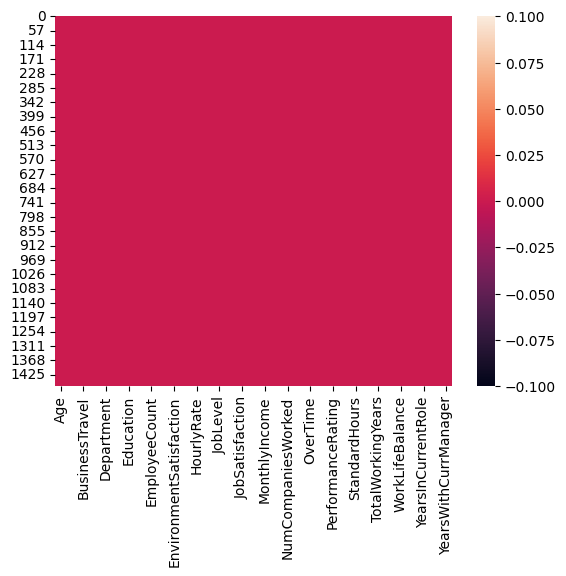

In [9]:
#Visualizing it
sns.heatmap(df.isnull())
plt.show()

In [10]:
# Checking for Duplicate values
df.duplicated().sum()

0

### `Observations:`
* **Missing Values:** The dataset is devoid of any missing or null values.
<br>
<br>
* **Duplicate Values:** No duplicate values present in our dataset.

## 5. Statistical Summary

### a. statistical Summary of numerical columns

In [11]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

### `Observations:`
1. **Age:**
   - The dataset contains 1,470 records with a mean age of approximately 36.92 years.
   - The standard deviation is around 9.14, indicating some variability in ages.
   - The age range spans from a minimum of 18 years to a maximum of 60 years.
   - 25% of the employees are below the age of 30, while 75% are below the age of 43.
<br>
<br>
2. **DailyRate:**
   - The dataset comprises 1,470 records with an average daily rate of about 802.49.
   - The daily rate's standard deviation is roughly 403.51, indicating a significant range in daily rates.
   - Daily rates vary from a minimum of 102 to a maximum of 1,499.
   - 25% of employees have a daily rate of 465 or less, while 75% have a rate of 1,157 or less.
<br>
<br>
3. **DistanceFromHome:**
   - There are 1,470 records in the dataset, with an average distance from home to work of approximately 9.19 units.
   - The standard deviation is around 8.11, signifying variability in the distances.
   - Employees' distances from home range from a minimum of 1 unit to a maximum of 29 units.
   - 25% of the employees have a distance of 2 units or less, while 75% have a distance of 14 units or less.
<br>
<br>
4. **Education:**
   - The dataset contains 1,470 records, and the average education level is approximately 2.91.
   - The standard deviation is around 1.02, indicating some variation in education levels.
   - The education levels range from a minimum of 1 to a maximum of 5.
   - 25% of employees have an education level of 2 or lower, while 75% have an education level of 4 or lower.
<br>
<br>
5. **EmployeeCount:**
   - All 1,470 records have the same employee count of 1. This column provides no variance, as there's only one value present.
<br>
<br>
6. **EmployeeNumber:**
   - The dataset comprises 1,470 records, with an average employee number of approximately 1,024.87.
   - The standard deviation is approximately 602.02, suggesting a wide range of employee numbers.
   - Employee numbers in the dataset range from a minimum of 1 to a maximum of 2,068.
   - 25% of employees have a number below 491.25, and 75% have a number below 1,555.75.
<br>
<br>
7. **EnvironmentSatisfaction:**
   - The dataset consists of 1,470 records, with an average environment satisfaction level of about 2.72.
   - The standard deviation is around 1.09, indicating some variation in satisfaction levels.
   - Satisfaction levels range from a minimum of 1 to a maximum of 4.
   - 25% of employees have satisfaction levels of 2 or lower, while 75% have levels of 4.
<br>
<br>
8. **HourlyRate:**
   - There are 1,470 records in the dataset, with an average hourly rate of approximately 65.89.
   - The standard deviation is about 20.33, indicating variability in hourly rates.
   - Hourly rates range from a minimum of 30 to a maximum of 100.
   - 25% of employees have hourly rates of 48 or lower, while 75% have rates of 83.75 or lower.
<br>
<br>
9. **JobInvolvement:**
   - The dataset contains 1,470 records, with an average job involvement level of approximately 2.73.
   - The standard deviation is around 0.71, indicating some variation in job involvement.
   - Job involvement levels range from a minimum of 1 to a maximum of 4.
   - 25% of employees have job involvement levels of 2 or lower, while 75% have levels of 3 or higher.
<br>
<br>
10. **JobLevel:**
    - There are 1,470 records in the dataset, and the average job level is approximately 2.06.
    - The standard deviation is about 1.11, signifying some variability in job levels.
    - Job levels range from a minimum of 1 to a maximum of 5.
    - 25% of employees hold job levels of 1 or lower, while 75% have job levels of 3 or lower.
<br>
<br>
11. **JobSatisfaction:**
    - The dataset consists of 1,470 records, with an average job satisfaction level of around 2.73.
    - The standard deviation is approximately 1.10, indicating variation in job satisfaction.
    - Job satisfaction levels range from a minimum of 1 to a maximum of 4.
    - 25% of employees have job satisfaction levels of 2 or lower, while 75% have levels of 4.
<br>
<br>
12. **MonthlyIncome:**
    - There are 1,470 records in the dataset, with an average monthly income of about 6,502.93.
    - The standard deviation is roughly 4,707.96, suggesting a wide range in monthly incomes.
    - Monthly incomes range from a minimum of 1,009 to a maximum of 19,999.
    - 25% of employees have monthly incomes of 2,911 or lower, while 75% have incomes of 8,379 or lower.
<br>
<br>
13. **MonthlyRate:**
    - The dataset contains 1,470 records, with an average monthly rate of approximately 14,313.10.
    - The standard deviation is about 7,117.79, indicating substantial variability in monthly rates.
    - Monthly rates range from a minimum of 2,094 to a maximum of 26,999.
    - 25% of employees have monthly rates of 8,047 or lower, while 75% have rates of 20,461.50 or lower.
<br>
<br>
14. **NumCompaniesWorked:**
    - The dataset contains 1,470 records, with an average number of companies worked at approximately 2.69.
    - The standard deviation is about 2.50, indicating variation in the number of companies worked.
    - The range for the number of companies worked extends from a minimum of 0 to a maximum of 9.
    - 25% of employees have worked at 1 company or less, while 75% have worked at 4 companies or less.
<br>
<br>
15. **PercentSalaryHike:**
    - There are 1,470 records in the dataset, and the average percentage salary hike is around 15.21.
    - The standard deviation is approximately 3.66, indicating variability in salary hikes.
    - Percentage salary hikes range from a minimum of 11 to a maximum of 25.
    - 25% of employees have received salary hikes of 12% or lower, while 75% have received hikes of 18% or lower.
<br>
<br>
16. **PerformanceRating:**
    - The dataset consists of 1,470 records, with a majority having a performance rating of 3.
    - There is little variance, with all employees having a performance rating of either 3 or 4.
<br>
<br>
17. **RelationshipSatisfaction:**
    - There are 1,470 records in the dataset, with an average relationship satisfaction level of about 2.71.
    - The standard deviation is approximately 1.08, suggesting variation in relationship satisfaction.
    - Satisfaction levels for relationships range from a minimum of 1 to a maximum of 4.
    - 25% of employees have relationship satisfaction levels of 2 or lower, while 75% have levels of 4.
<br>
<br>
18. **StandardHours:**
    - All 1,470 records have the same standard working hours of 80, with no variance.
<br>
<br>
19. **StockOptionLevel:**
    - The dataset contains 1,470 records, and the average stock option level is approximately 0.79.
    - The standard deviation is about 0.85, indicating some variability in stock option levels.
    - Stock option levels range from a minimum of 0 to a maximum of 3.
    - 25% of employees have stock option levels of 0, while 75% have levels of 1 or lower.
<br>
<br>
20. **TotalWorkingYears:**
    - The dataset contains 1,470 records, with an average total working years of approximately 11.28.
    - The standard deviation is about 7.78, indicating variation in total working years.
    - Total working years range from a minimum of 0 to a maximum of 40.
    - 25% of employees have worked for 6 years or less, while 75% have worked for 15 years or less.
<br>
<br>
21. **TrainingTimesLastYear:**
    - There are 1,470 records in the dataset, with an average number of training times last year of about 2.80.
    - The standard deviation is approximately 1.29, indicating some variability in the number of training times.
    - The number of training times last year ranges from a minimum of 0 to a maximum of 6.
    - 25% of employees had no training last year, while 75% had training 3 times or fewer.
<br>
<br>
22. **WorkLifeBalance:**
    - The dataset contains 1,470 records, with an average work-life balance rating of about 2.76.
    - The standard deviation is about 0.71, suggesting some variation in work-life balance ratings.
    - Work-life balance ratings range from a minimum of 1 to a maximum of 4.
    - 25% of employees have work-life balance ratings of 2 or lower, while 75% have ratings of 3 or higher.
<br>
<br>
23. **YearsAtCompany:**
    - There are 1,470 records in the dataset, with an average number of years at the company of approximately 7.01.
    - The standard deviation is about 6.13, indicating variation in the number of years at the company.
    - The number of years at the company ranges from a minimum of 0 to a maximum of 40.
    - 25% of employees have worked at the company for 3 years or less, while 75% have worked for 9 years or less.
<br>
<br>
24. **YearsInCurrentRole:**
    - The dataset consists of 1,470 records, with an average number of years in the current role of about 4.23.
    - The standard deviation is approximately 3.62, indicating variation in the number of years in the current role.
    - The number of years in the current role ranges from a minimum of 0 to a maximum of 18.
    - 25% of employees have spent 2 years or less in their current role, while 75% have spent 7 years or less.
<br>
<br>
25. **YearsSinceLastPromotion:**
    - There are 1,470 records in the dataset, with an average number of years since the last promotion of about 2.19.
    - The standard deviation is about 3.22, indicating variation in the number of years since the last promotion.
    - The number of years since the last promotion ranges from a minimum of 0 to a maximum of 15.
    - 25% of employees have not been promoted in the last year, while 75% have been promoted within the last 3 years.
<br>
<br>
26. **YearsWithCurrManager:**
    - The dataset contains 1,470 records, with an average number of years with the current manager of approximately 4.12.
    - The standard deviation is about 3.57, indicating variation in the number of years with the current manager.
    - The number of years with the current manager ranges from a minimum of 0 to a maximum of 17.
    - 25% of employees have worked with their current manager for 2 years or less, while 75% have worked for 7 years or less.
    
### Insights:
One very important observation that can be made from the provided data is that the "EmployeeCount" column has a constant value of 1. This means that all the records in the dataset have the same value for this feature, and it doesn't provide any meaningful information for analysis. As a result, this column can be safely removed from the dataset as it won't contribute to any insights or patterns.

Additionally, it is noticed that some of the columns like "StandardHours" & "Over18" have a constant value of 80 & "Y". This means that this feature also does not vary across the dataset and contains no useful information for analysis. Hence, it can also be removed from the dataset.

Also there is a column EmployeeNumber which is unique for every feature, This will not contributue to pridict Attrition, we can drop this as well

In [12]:
#Dropping columns
df.drop(columns=['EmployeeCount','StandardHours', 'EmployeeNumber', 'Over18'], axis=1, inplace=True)

In [13]:
print('After dropping we have {} rows & {} columns'.format(*df.shape))

After dropping we have 1470 rows & 31 columns


## 6. Data Visualization:

In [14]:
# Separating Numerical & Categorical columns

cat_col = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",cat_col)
print("\n")

num_col = df.select_dtypes(include=['int64']).columns
print("Numerical columns are:",num_col)

Categorical columns are: Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


Numerical columns are: Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### a. Univariate Analysis

In [15]:
#Unique Values in each columns in our dataset
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

#### i. Univariate Analysis for Categrical columns

In [16]:
# Value Counts of categorical columns in our Dataframe
for i in cat_col:
    print(df[i].value_counts())
    print("\n")

No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Male      882
Female    588
Name: Gender, dtype: int64


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


No     1054
Yes     416
Name: OverTime, dtype: int64




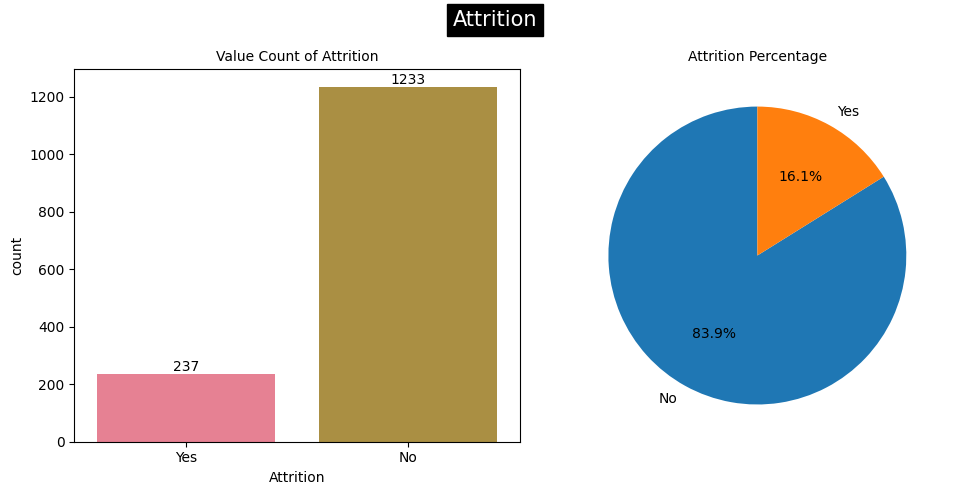

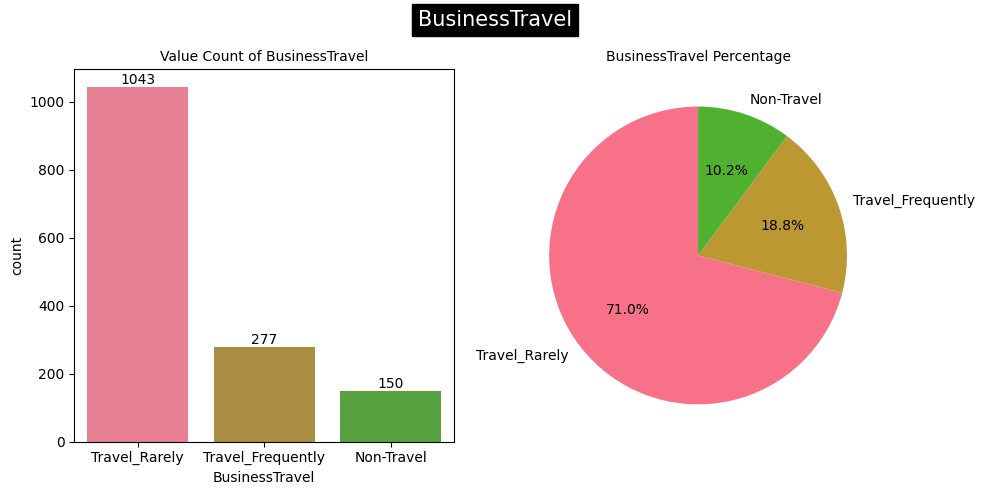

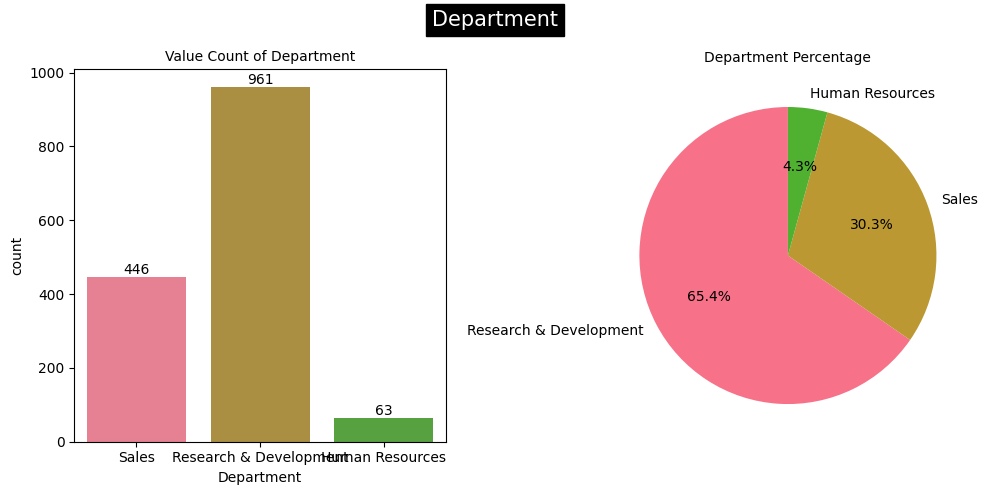

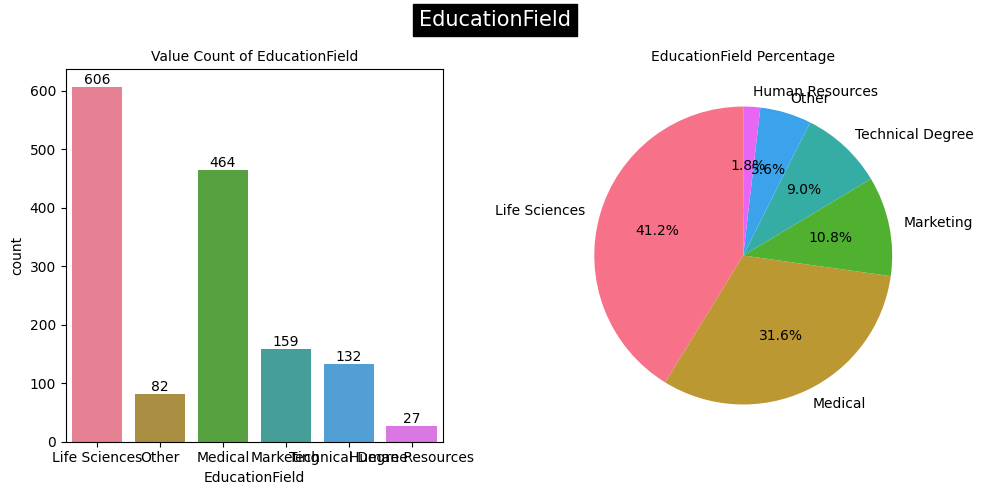

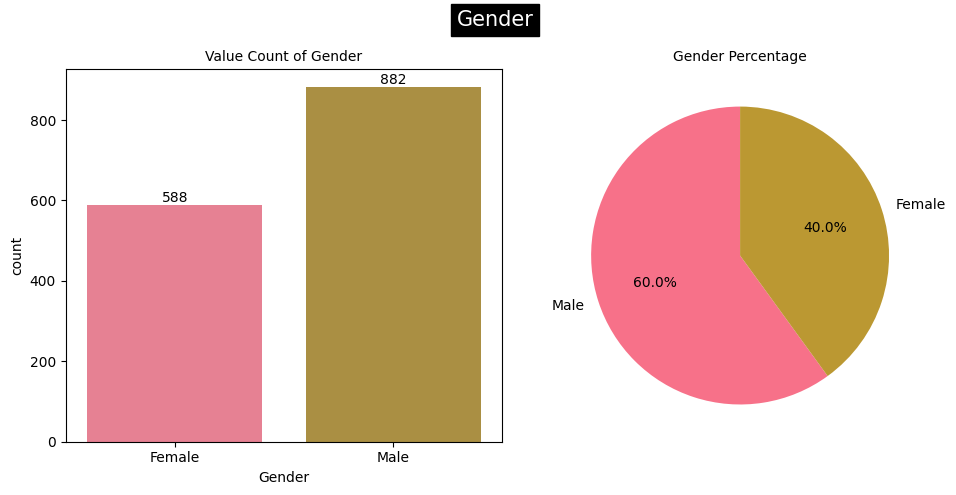

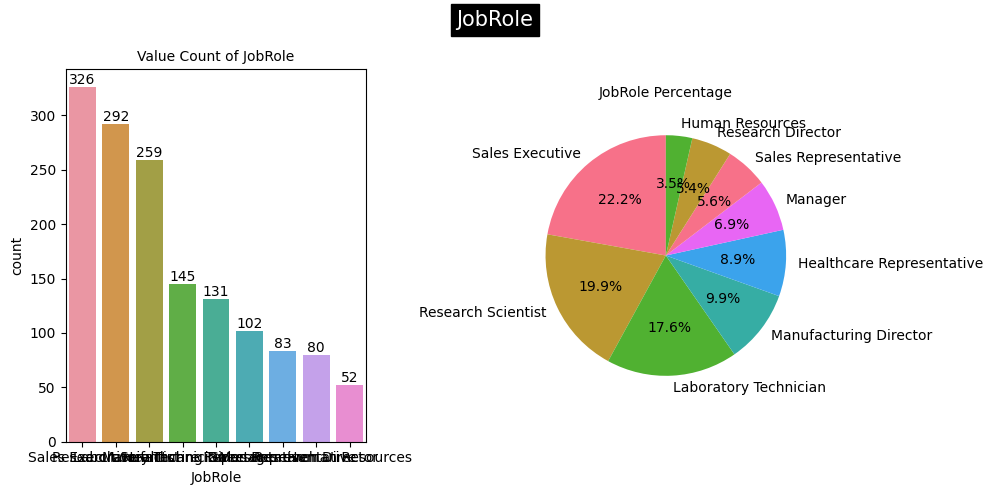

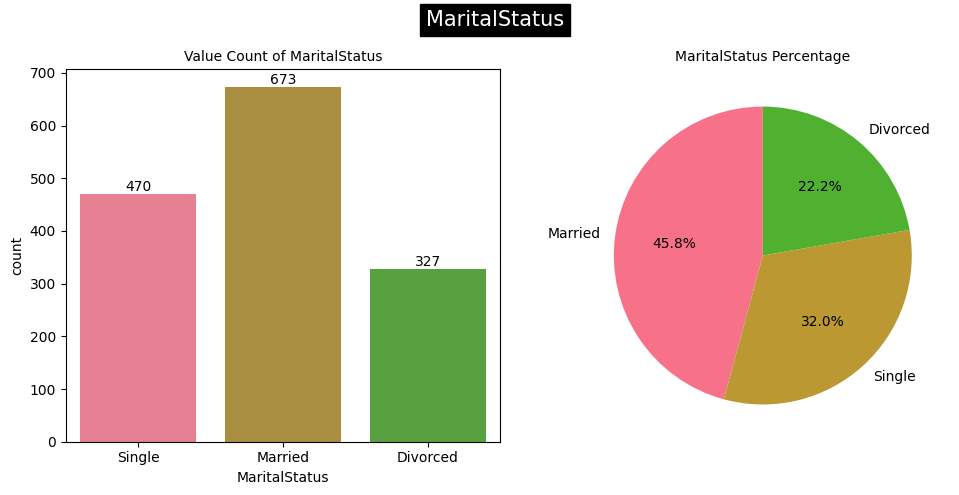

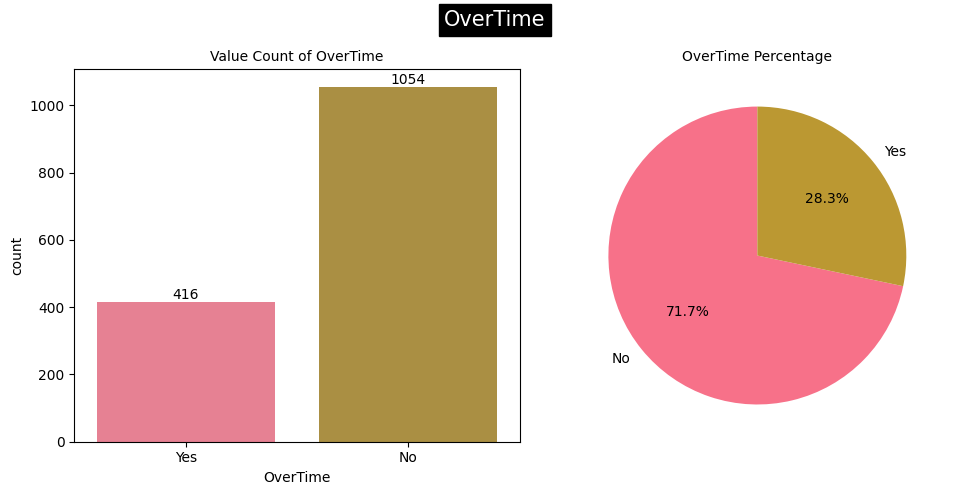

In [17]:
# Create a subplot layout with two subplots side by side

for i, column in enumerate(cat_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    sns.set_palette("husl")
    
    # Plot the countplot
    ax = sns.countplot(x=column, data=df, ax=axes[0])
    for container in ax.containers:
        ax.bar_label(container)
    ax.set_title(f'Value Count of {column}', fontsize=10)

    # Plot the pie chart
    column_counts = df[column].value_counts()
    ax = axes[1]
    ax.pie(column_counts, labels=column_counts.index, autopct='%0.1f%%', startangle=90)
    ax.set_title(f'{column} Percentage', fontsize=10)
    
    fig.suptitle(column, fontsize=15, backgroundcolor='black',color='white')
    plt.tight_layout()
    plt.show()

### `Observations:`

1. **Attrition**:
   - 'No' accounts for approximately 83.9% of employees, while 'Yes' accounts for about 16.1%. This indicates that the majority of employees have not experienced attrition, which is a positive sign.
<br>
<br>
2. **Business Travel**:
   - 'Travel_Rarely' is the most common type of business travel, representing approximately 71.0% of employees.
   - 'Travel_Frequently' is the second most common, accounting for about 18.8%.
   - 'Non-Travel' is the least common, with approximately 10.2% of employees opting for no business travel.
<br>
<br>
3. **Department**:
   - 'Research & Development' is the largest department, with around 65.4% of employees.
   - 'Sales' represents approximately 30.3% of the workforce.
   - 'Human Resources' is the smallest department, with only about 4.3% of employees.
<br>
<br>
4. **Education Field**:
   - 'Life Sciences' is the most common education field, with around 41.2% of employees.
   - 'Medical' follows, accounting for approximately 31.6%.
   - 'Marketing,' 'Technical Degree,' 'Other,' and 'Human Resources' are less common, with varying percentages.
<br>
<br>
5. **Gender**:
   - The workforce is fairly balanced in terms of gender, with 'Male' representing approximately 60.0% and 'Female' about 40.0%.
<br>
<br>
6. **Job Role**:
   - 'Sales Executive' is the most common job role, with around 22.2% of employees.
   - 'Research Scientist' and 'Laboratory Technician' follow closely, at approximately 19.9% and 17.6%, respectively.
   - 'Human Resources' has the fewest employees, accounting for about 3.5%.
<br>
<br>
7. **Marital Status**:
   - 'Married' employees represent the largest group at approximately 45.8%.
   - 'Single' employees account for about 32.0%.
   - 'Divorced' employees make up around 22.2% of the workforce.
<br>
<br>
8. **Overtime**:
   - The majority of employees, about 71.7%, do not work overtime.
   - Approximately 28.3% of employees work overtime, indicating a substantial portion of the workforce may have increased work demands.

These observations provide insights into the demographic and work-related characteristics of the employees in the dataset, which can be valuable for HR and management decision-making.

#### ii. Univariate Analysis of Numerical Columns

In [18]:
for i in num_col:
    print(df[i].value_counts())
    print("\n")

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


3    453
4    446
2    287

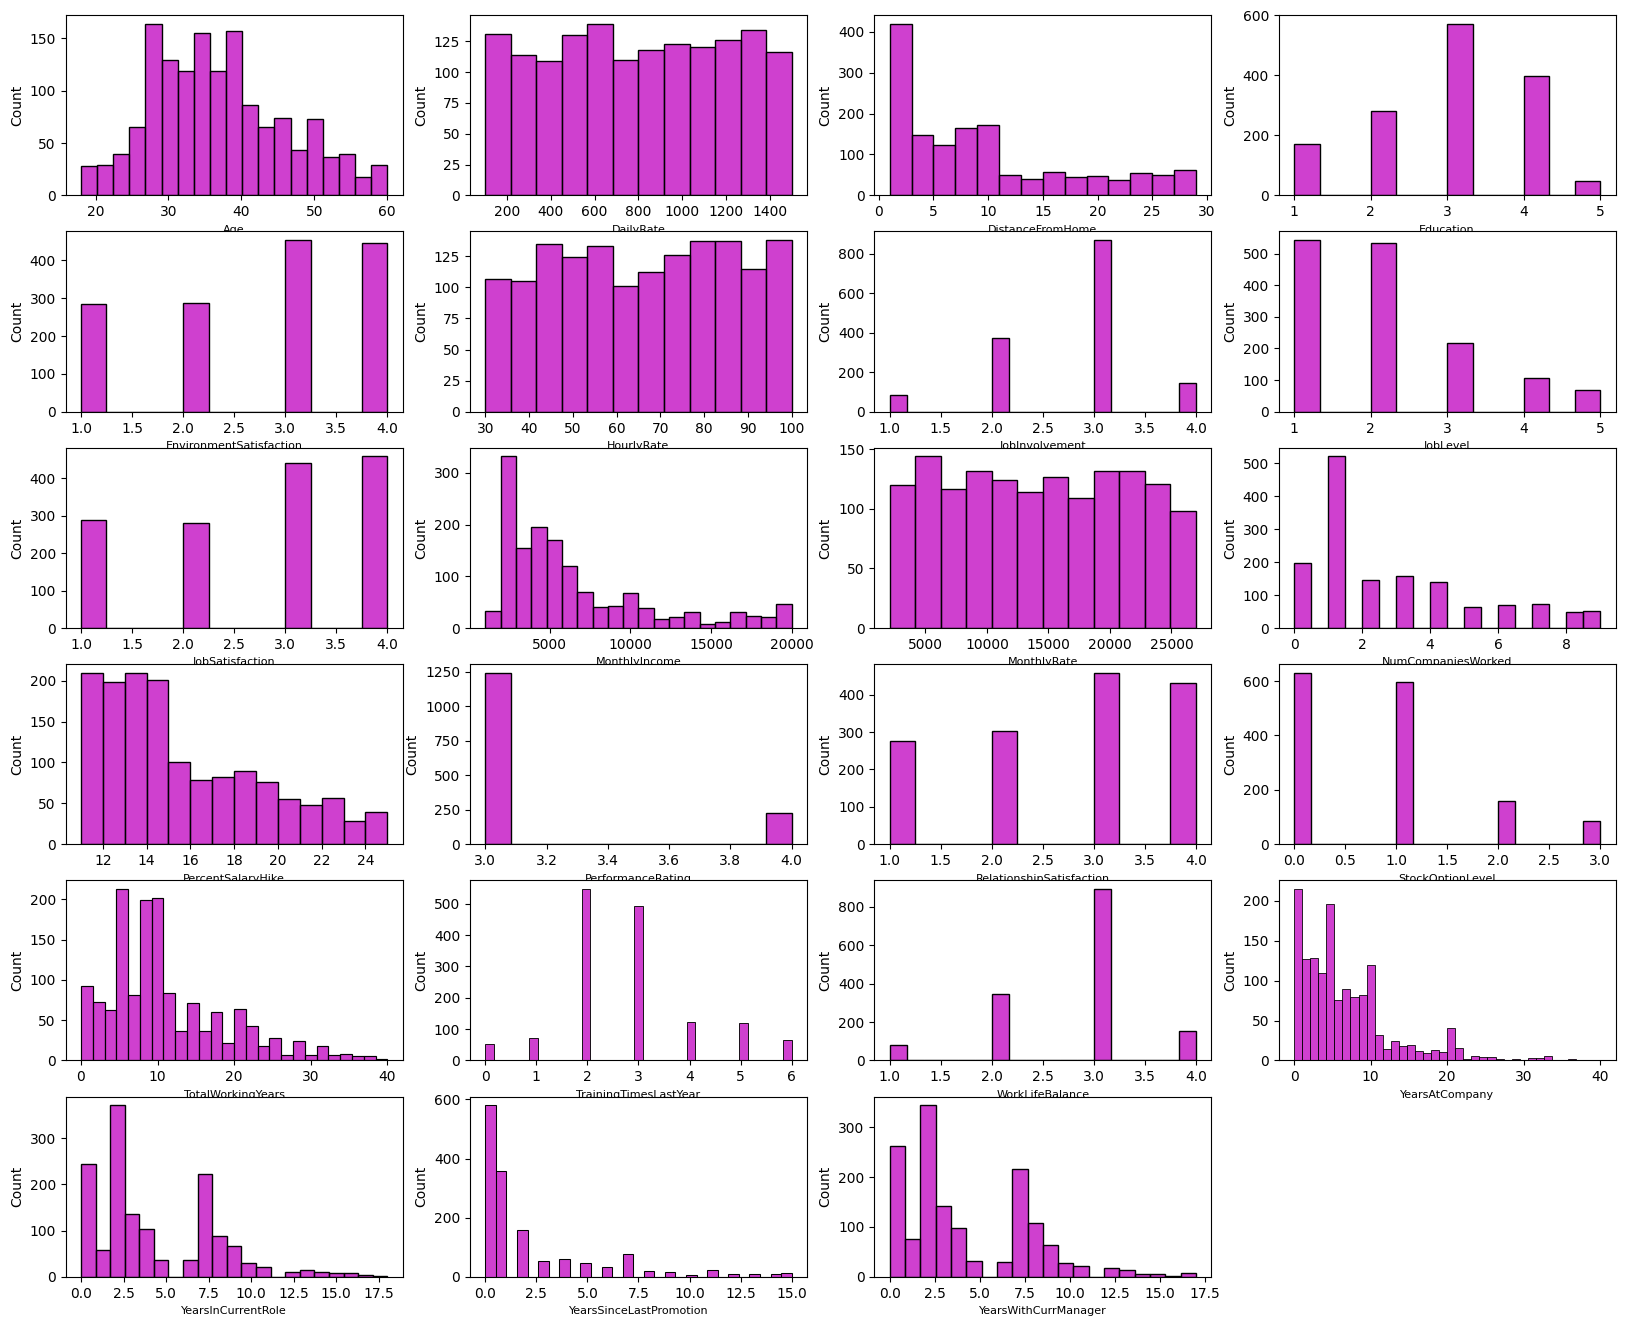

In [19]:
#Visiualizing it using Histogram
plt.figure(figsize=(20,22), facecolor='white')
plotnumber =1
for column in num_col:
    if plotnumber <=35:
        ax = plt.subplot(8,4,plotnumber)
        sns.histplot(df[column], color='m')
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.tight_layout
plt.show()

### `Observations:`

1. **Age**:
   - Most employees are between the ages of mid 20's to 40's.
   - There is a significant drop in the number of employees after the age of 45.
   - A smaller number of employees are in their late 50s and early 60s.
<br>
<br>
2. **DailyRate**:
   - Daily rates vary widely, with a majority of employees having lower daily rates.
   - A few employees have notably high daily rates.
<br>
<br>
3. **DistanceFromHome**:
   - Most employees live relatively close to their workplace, with the majority having a distance from home of 1 to 5.
   - A smaller percentage of employees have a larger distance from home.
<br>
<br>
4. **Education**:
   - The highest education level attained by most employees is Education Level 3.
   - A significant number of employees also have Education Level 4.
   - Few employees have only Education Level 1 or 2.
<br>
<br>
5. **EnvironmentSatisfaction**:
   - A majority of employees report moderate levels of environmental satisfaction (ratings 2 and 3).
   - A smaller number report high (rating 4) or very high (rating 1) satisfaction.
<br>
<br>
6. **HourlyRate**:
   - Hourly rates vary, with no particular pattern observed.
   - The data seems to be spread across different hourly rate values.
<br>
<br>
7. **JobInvolvement**:
   - A significant number of employees report moderate job involvement (rating 3).
   - A majority of employees report job involvement ratings of 2, 3, or 4.
<br>
<br>
8. **JobLevel**:
   - Most employees have a job level of 1 or 2.
   - There are relatively fewer employees at higher job levels.
<br>
<br>
9. **JobSatisfaction**:
   - Job satisfaction ratings are fairly evenly distributed across ratings 1 to 4.
   - Very few employees report a job satisfaction rating of 4.
<br>
<br>
10. **MonthlyIncome**:
    - Monthly income varies widely, with a majority of employees earning less than the average income.
    - There are a few employees with significantly higher monthly incomes.
<br>
<br>
11. **MonthlyRate**:
    - Monthly rates also vary widely, with no specific patterns.
    - The data is spread across different monthly rate values.
<br>
<br>
12. **NumCompaniesWorked**:
    - Most employees have worked at only 1 or 2 companies.
    - A smaller percentage of employees have worked at 3 or more companies.
<br>
<br>
13. **PercentSalaryHike**:
    - The majority of employees received a percent salary hike of 11% or 13%.
    - Few employees received a percent salary hike of 15% or higher.
<br>
<br>
14. **PerformanceRating**:
    - The performance ratings of employees are predominantly 3 or 4.
<br>
<br>
15. **RelationshipSatisfaction**:
    - Relationship satisfaction ratings are fairly evenly distributed.
    - Most employees report ratings of 1, 2, or 3.
<br>
<br>
16. **StockOptionLevel**:
    - A significant number of employees have 0 or 1 stock options.
    - Few employees have higher levels of stock options (2 or more).
<br>
<br>
17. **TotalWorkingYears**:
    - The total number of years employees have worked varies widely.
    - A majority have worked between 1 to 10 years.
    - Few employees have extensive working experience of 20 years or more.
<br>
<br>
18. **TrainingTimesLastYear**:
    - The number of training times last year is fairly evenly distributed, with the majority having 2 or 3 training times.
<br>
<br>
19. **WorkLifeBalance**:
    - Employees' perceptions of work-life balance are spread across different ratings, with a significant number reporting ratings of 2 or 3.
<br>
<br>
20. **YearsAtCompany**:
    - Most employees have spent 1 to 10 years at the company.
    - Few employees have been with the company for more than 20 years.
<br>
<br>
21. **YearsInCurrentRole**:
    - The number of years employees have spent in their current role is varied.
    - A significant number have spent 0 to 7 years in their current role.
<br>
<br>
22. **YearsSinceLastPromotion**:
    - The years since the last promotion also vary.
    - A significant number of employees have been promoted within the last 3 years.
<br>
<br>
23. **YearsWithCurrManager**:
    - The number of years employees have been with their current manager varies.
    - A significant number have spent 0 to 4 years with their current manager.

## b. Bivariate Analysis

#### i. Categorical Column vs Target

In [20]:
#Removing Attrition variable from categorical list
cat_col=cat_col[1:]

# Iterate through each categorical column
for col in cat_col:
    
    # Group by 'Attrition' and the current categorical column
    attrition_counts = df.groupby(['Attrition', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Attrition'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    attrition_percentages = (attrition_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    attrition_df = pd.concat([attrition_counts, attrition_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(attrition_df)
    print('*'*60)

                             Count  Percentage
Attrition BusinessTravel                      
No        Non-Travel           138       92.00
          Travel_Frequently    208       75.09
          Travel_Rarely        887       85.04
Yes       Non-Travel            12        8.00
          Travel_Frequently     69       24.91
          Travel_Rarely        156       14.96
************************************************************
                                  Count  Percentage
Attrition Department                               
No        Human Resources            51       80.95
          Research & Development    828       86.16
          Sales                     354       79.37
Yes       Human Resources            12       19.05
          Research & Development    133       13.84
          Sales                      92       20.63
************************************************************
                            Count  Percentage
Attrition EducationField                

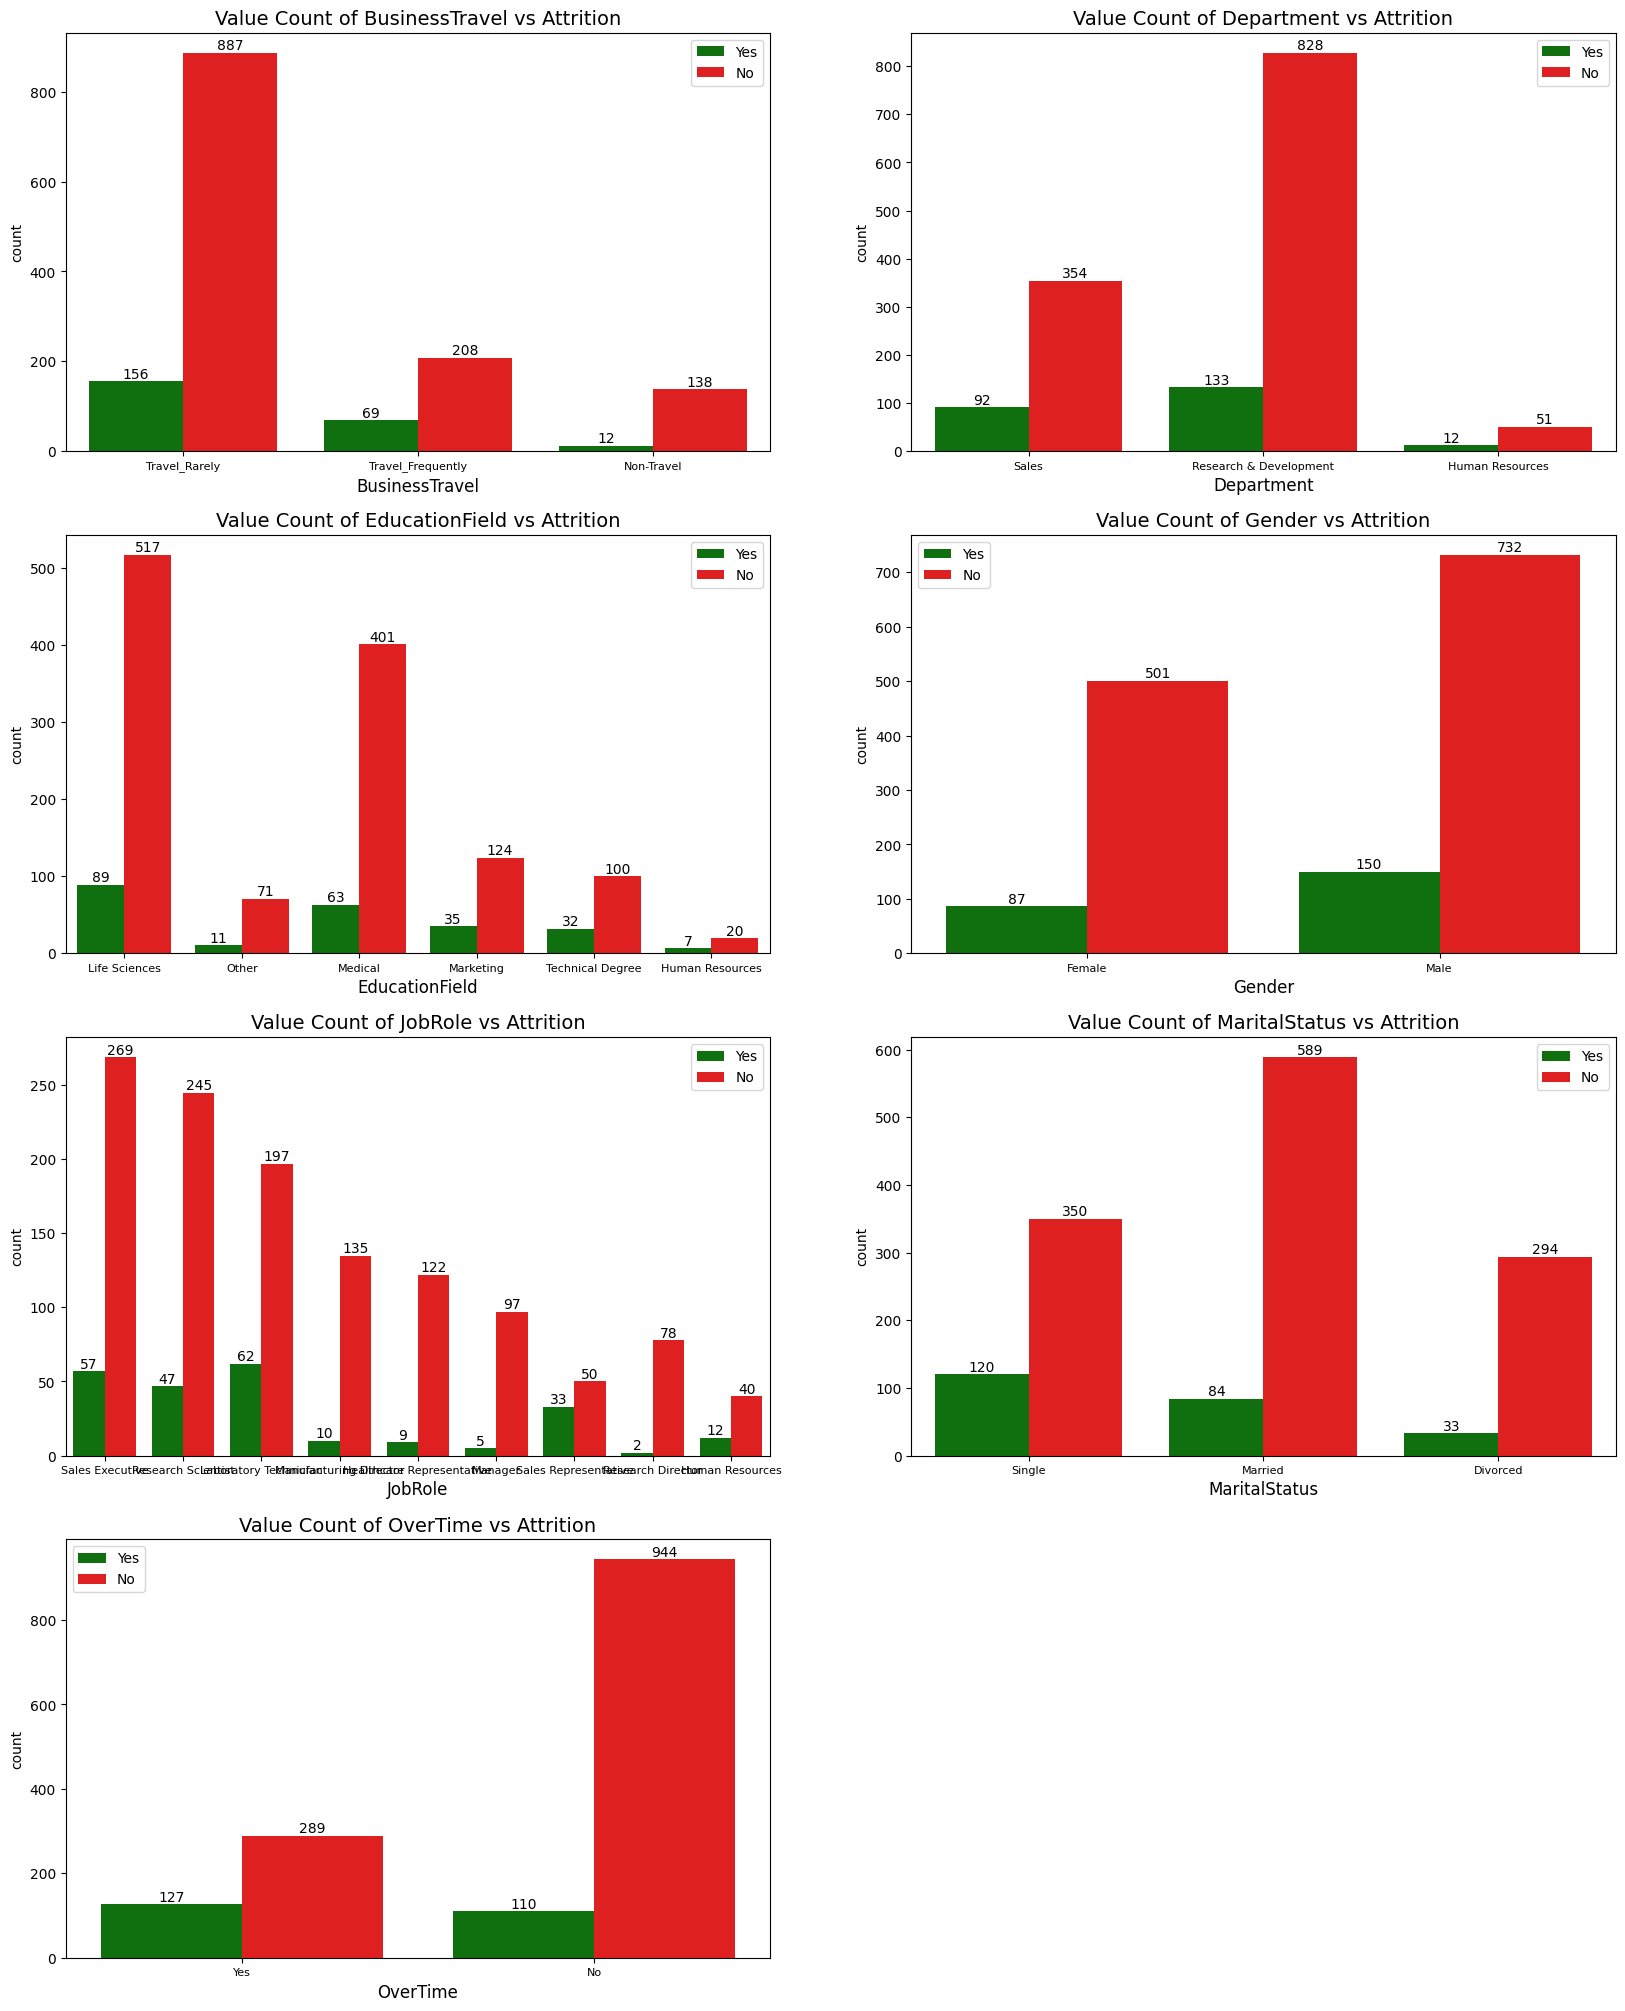

In [21]:
# Visualization of Categorical column Vs Attrition
plt.figure(figsize=(20,25))
p=1

for i in cat_col:
    if p<=8:
        plt.subplot(4,2,p)
        custom_palette = {"Yes": "g", "No": "r"} ## Define a custom color palette
        ax= sns.countplot(x=i, hue='Attrition',data=df, palette=custom_palette)
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(f'Value Count of {i} vs Attrition', fontsize=14)
        plt.xlabel(i, fontsize=12)
        plt.xticks(fontsize=8)
        plt.legend()
    p+=1
plt.show()

### `Observations:`

1. **Attrition vs. Business Travel:**
   - Within the "No" category of Attrition:
     - The count for "Non-Travel" is 138, with a percentage of 92.00%.
     - The count for "Travel_Frequently" is 208, with a percentage of 75.09%.
     - The count for "Travel_Rarely" is 887, with a percentage of 85.04%.
   - Within the "Yes" category of Attrition:
     - The count for "Non-Travel" is 12, with a percentage of 8.00%.
     - The count for "Travel_Frequently" is 69, with a percentage of 24.91%.
     - The count for "Travel_Rarely" is 156, with a percentage of 14.96%.

The data suggests that there is a difference in Attrition rates based on Business Travel. 
Maximum attrition is observed in the "Travel_Rarely" category, followed by "Travel_Frequently," and the least attrition is observed in the "Non-Travel" category.

2. **Attrition vs. Department:**
   - Within the "No" category of Attrition:
     - The count for the "Human Resources" department is 51, with a percentage of 80.95%.
     - The count for the "Research & Development" department is 828, with a percentage of 86.16%.
     - The count for the "Sales" department is 354, with a percentage of 79.37%.
   - Within the "Yes" category of Attrition:
     - The count for the "Human Resources" department is 12, with a percentage of 19.05%.
     - The count for the "Research & Development" department is 133, with a percentage of 13.84%.
     - The count for the "Sales" department is 92, with a percentage of 20.63%.

The data indicates that the "Human Resources" department has a relatively higher attrition rate compared to other departments.

3. **Attrition vs. Education Field:**
   - Within the "No" category of Attrition:
     - The count for the "Human Resources" education field is 20, with a percentage of 74.07%.
     - The count for "Life Sciences" is 517, with a percentage of 85.31%.
     - The count for "Marketing" is 124, with a percentage of 77.99%.
     - The count for "Medical" is 401, with a percentage of 86.42%.
     - The count for "Other" is 71, with a percentage of 86.59%.
     - The count for "Technical Degree" is 100, with a percentage of 75.76%.
   - Within the "Yes" category of Attrition:
     - The count for the "Human Resources" education field is 7, with a percentage of 25.93%.
     - The count for "Life Sciences" is 89, with a percentage of 14.69%.
     - The count for "Marketing" is 35, with a percentage of 22.01%.
     - The count for "Medical" is 63, with a percentage of 13.58%.
     - The count for "Other" is 11, with a percentage of 13.41%.
     - The count for "Technical Degree" is 32, with a percentage of 24.24%.

The data shows variations in attrition rates based on the education field.

4. **Attrition vs. Gender:**
   - Within the "No" category of Attrition:
     - The count for females is 501, with a percentage of 85.20%.
     - The count for males is 732, with a percentage of 82.99%.
   - Within the "Yes" category of Attrition:
     - The count for females is 87, with a percentage of 14.80%.
     - The count for males is 150, with a percentage of 17.01%.

The data suggests that both genders experience attrition, with males having a slightly higher attrition rate.

5. **Attrition vs. Gender:**
    - Within the "No" category of Attrition:
        - The count for females is 501, with a percentage of 85.20%.
        - The count for males is 732, with a percentage of 82.99%.
    - Within the "Yes" category of Attrition:
        - The count for females is 87, with a percentage of 14.80%.
        - The count for males is 150, with a percentage of 17.01%.

The data suggests that both genders experience attrition, with males having a slightly higher attrition rate.

6. **Attrition vs. Marital Status:**
   - Within the "No" category of Attrition:
     - The count for "Divorced" employees is 294, with a percentage of 89.91%.
     - The count for "Married" employees is 589, with a percentage of 87.52%.
     - The count for "Single" employees is 350, with a percentage of 74.47%.
   - Within the "Yes" category of Attrition:
     - The count for "Divorced" employees is 33, with a percentage of 10.09%.
     - The count for "Married" employees is 84, with a percentage of 12.48%.
     - The count for "Single" employees is 120, with a percentage of 25.53%.

The data suggests that employees with different marital statuses experience different attrition rates.

7. **Attrition vs. Overtime:**
   - Within the "No" category of Attrition:
     - The count for employees with "No" overtime is 944, with a percentage of 89.56%.
     - The count for employees with "Yes" overtime is 289, with a percentage of 69.47%.
   - Within the "Yes" category of Attrition:
     - The count for employees with "No" overtime is 110, with a percentage of 10.44%.
     - The count for employees with "Yes" overtime is 127, with a percentage of 30.53%.

The data shows that attrition rates are affected by whether employees work overtime or not. Those who work overtime tend to have higher attrition rates.

#### ii. Numerical Column vs Target

In [22]:
num_col

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [23]:
# Iterate through each categorical column
for col in num_col:
    # Group by 'Attrition' and the current categorical column
    attrition_counts = df.groupby(['Attrition', col])[col].count()
    
    # Calculate the total count for each category in the current column
    total_counts = df.groupby(col)['Attrition'].count()
    
    # Calculate the percentage of 'Attrition' for each category in the current column
    attrition_percentages = (attrition_counts / total_counts * 100).round(2)
    
    # Create a DataFrame to display the counts and percentages
    attrition_df = pd.concat([attrition_counts, attrition_percentages], axis=1, keys=['Count', 'Percentage'])
    
    # Print the results
    print(attrition_df)
    print('\n')

               Count  Percentage
Attrition Age                   
No        18       4       50.00
          19       3       33.33
          20       5       45.45
          21       7       53.85
          22      11       68.75
...              ...         ...
Yes       52       3       16.67
          53       2       10.53
          55       3       13.64
          56       3       21.43
          58       5       35.71

[82 rows x 2 columns]


                     Count  Percentage
Attrition DailyRate                   
No        102            1      100.00
          105            1      100.00
          106            1      100.00
          107            1      100.00
          111            3      100.00
...                    ...         ...
Yes       1474           1       50.00
          1475           2      100.00
          1479           1       50.00
          1485           1       33.33
          1496           1       50.00

[1021 rows x 2 columns]


            

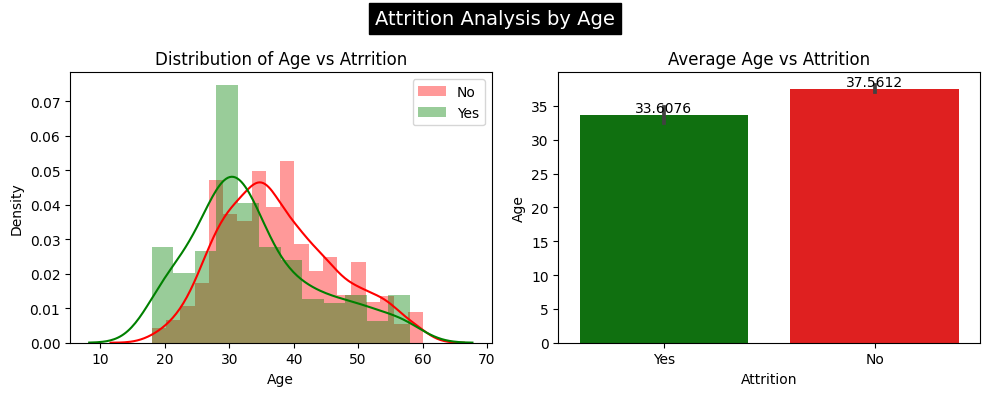

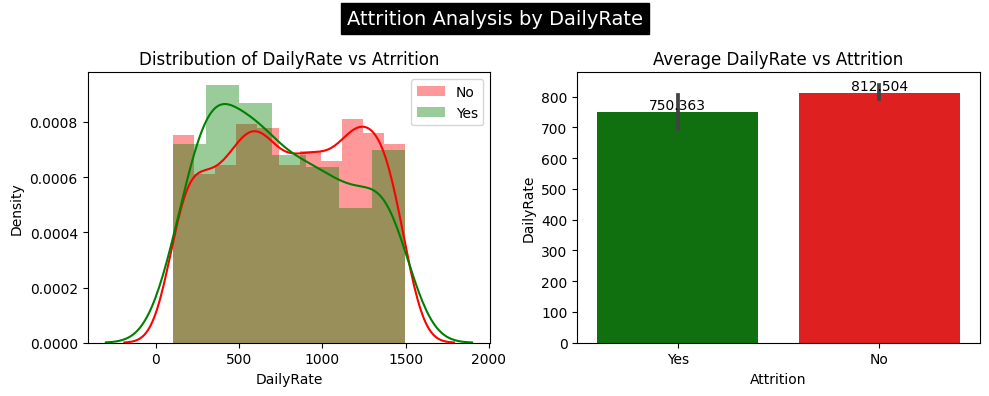

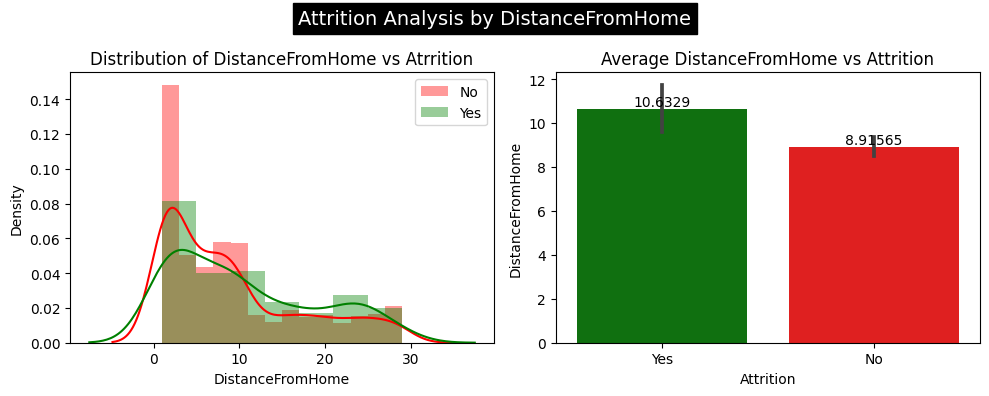

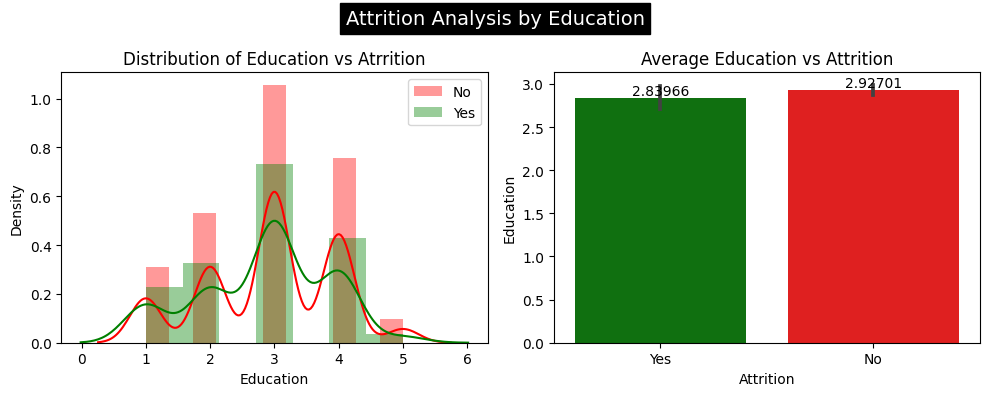

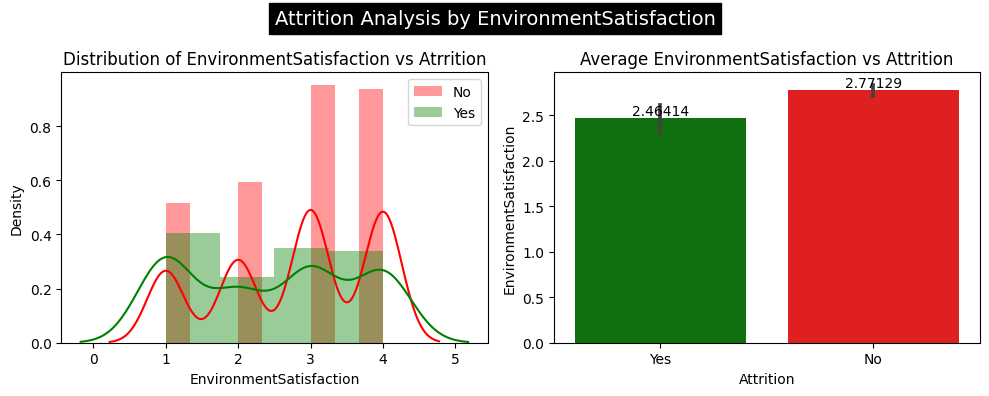

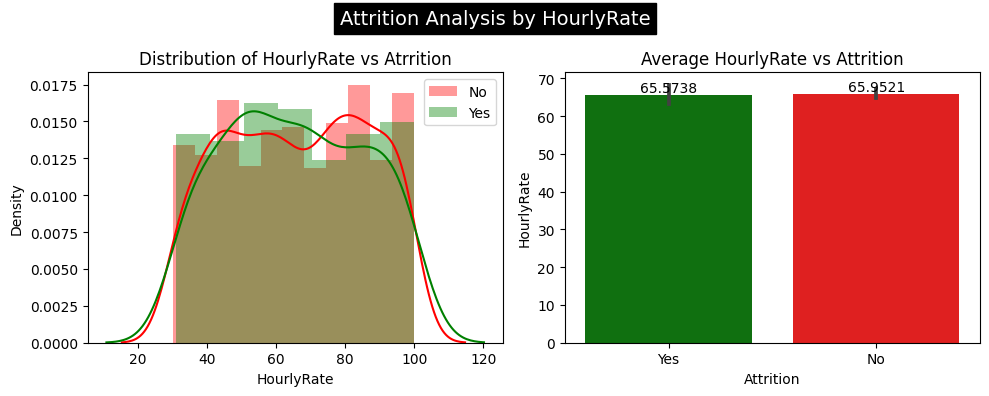

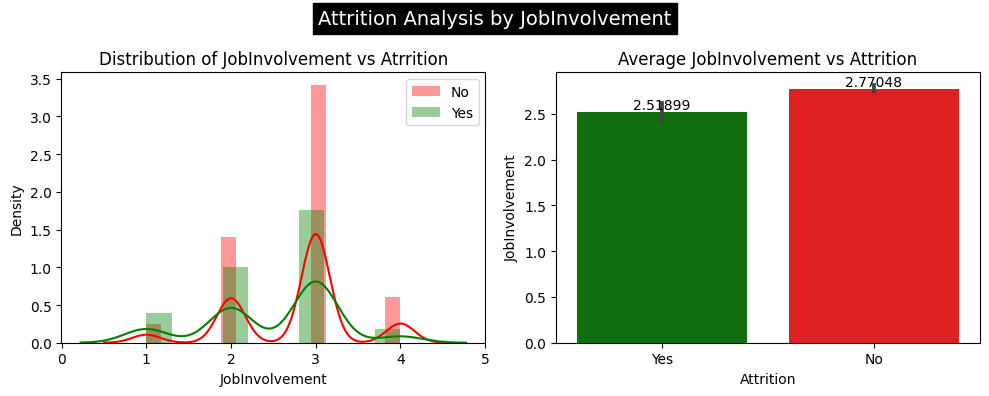

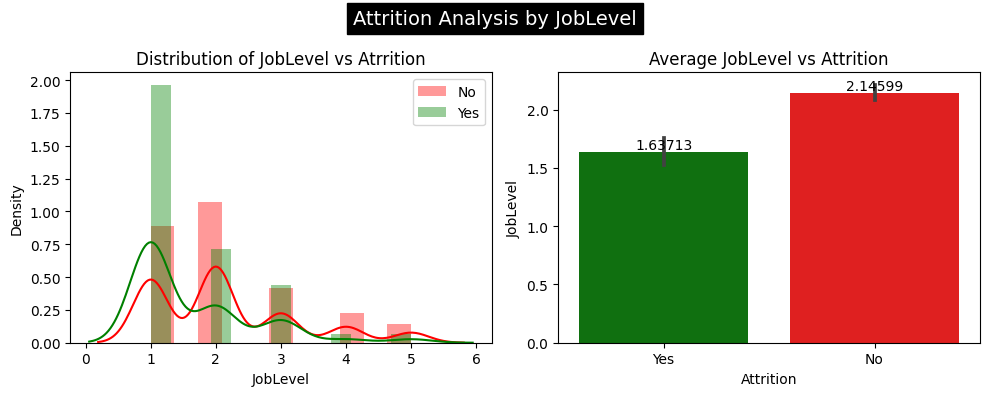

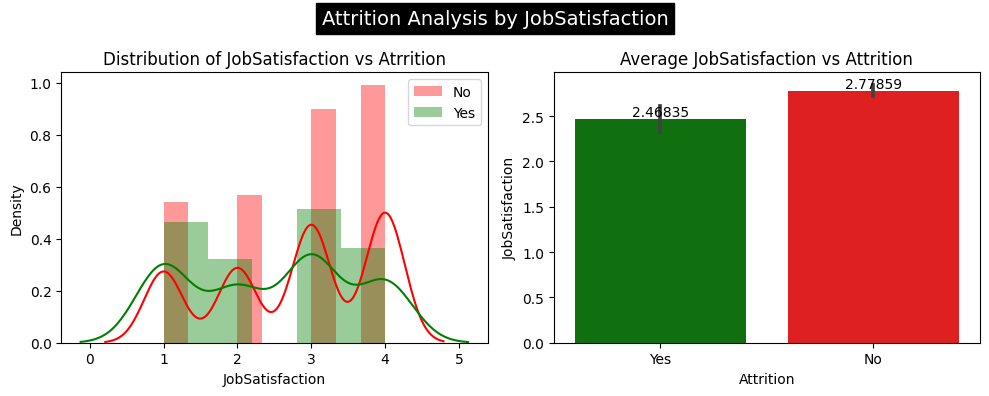

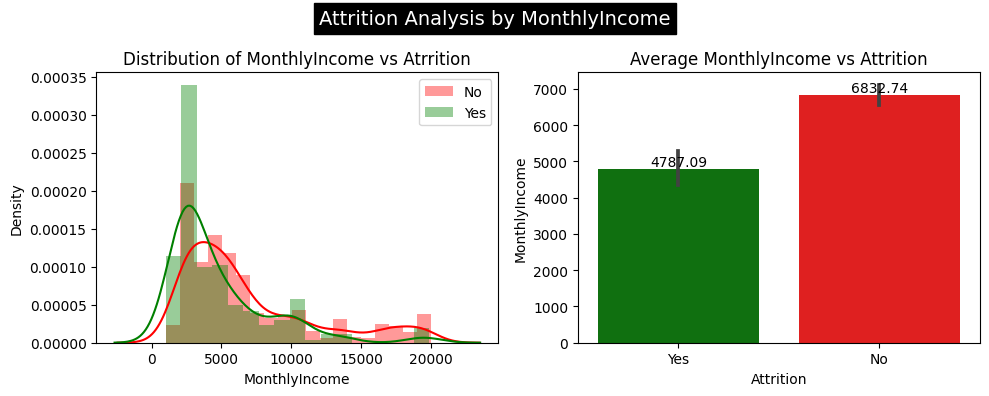

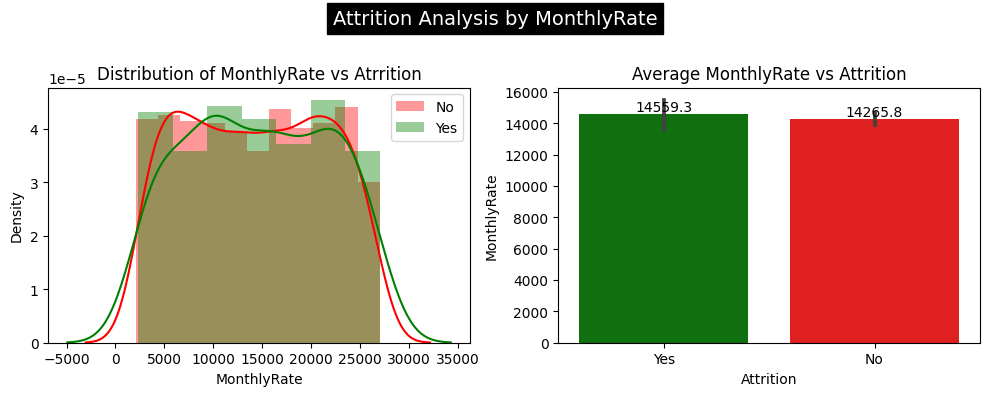

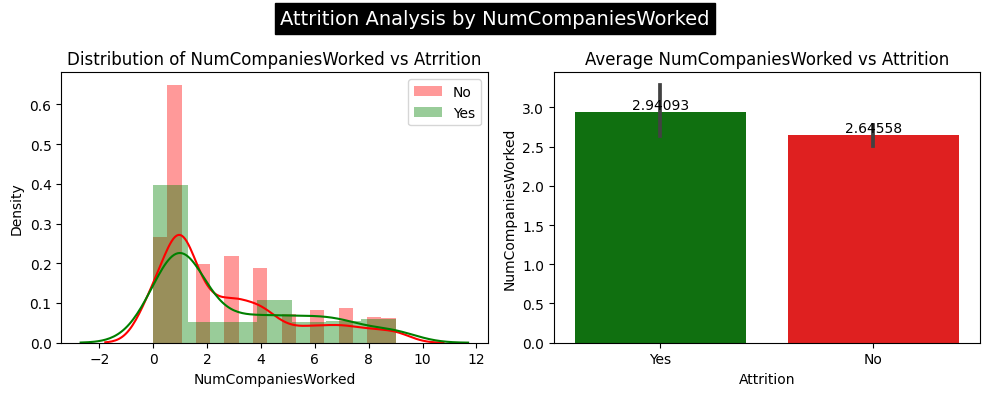

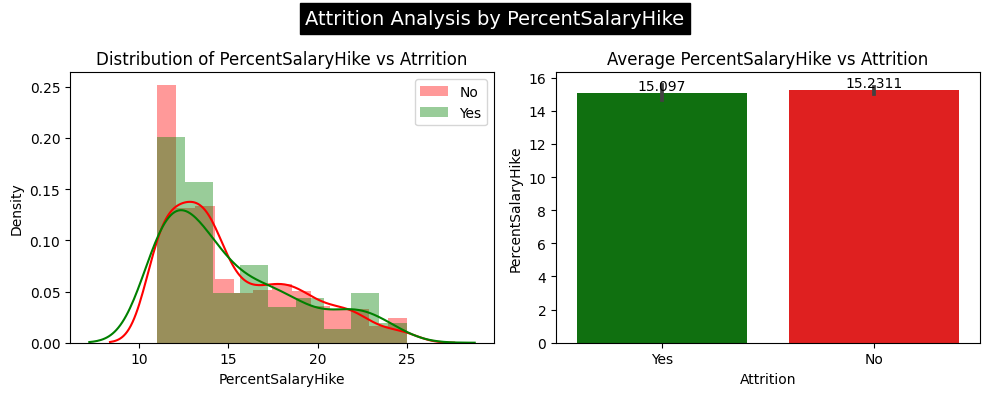

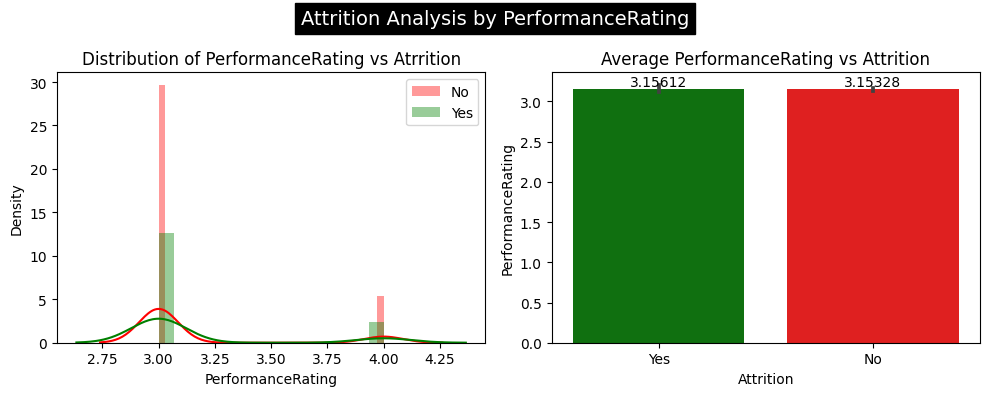

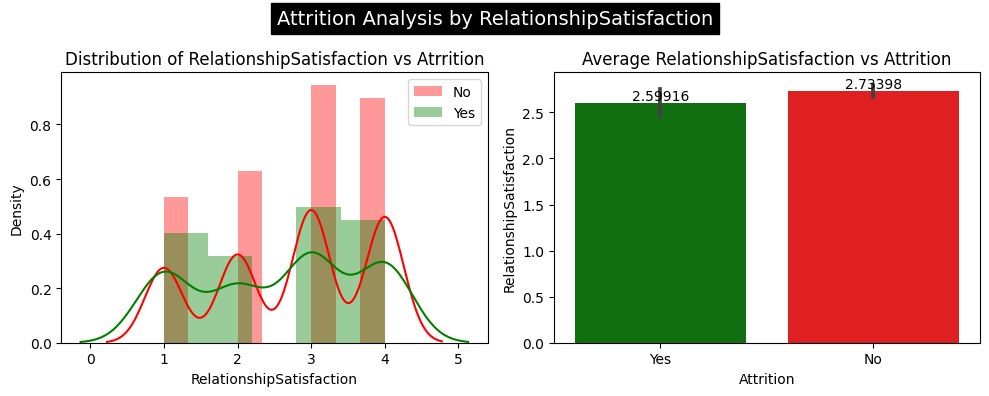

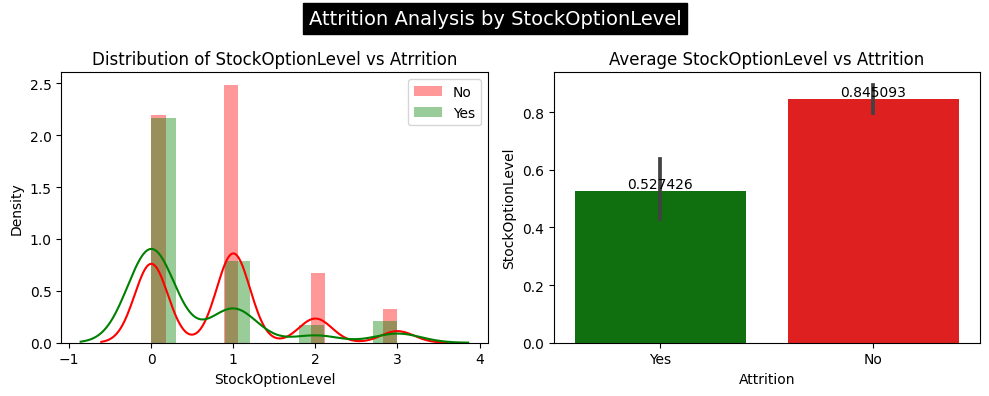

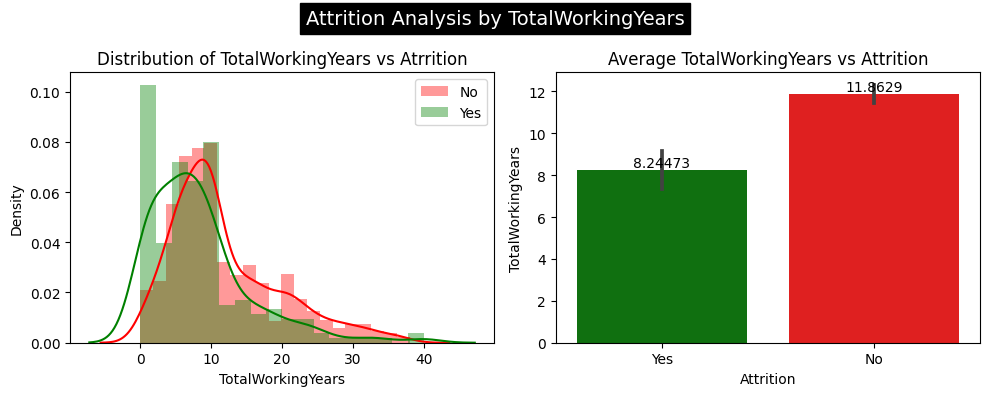

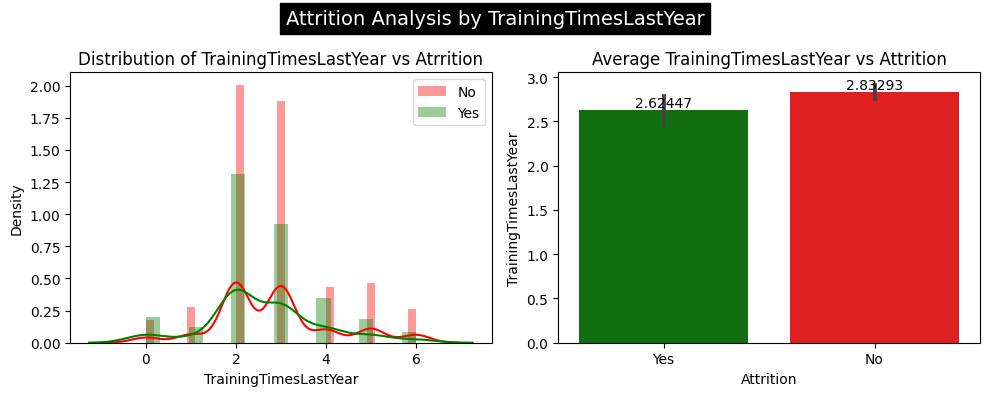

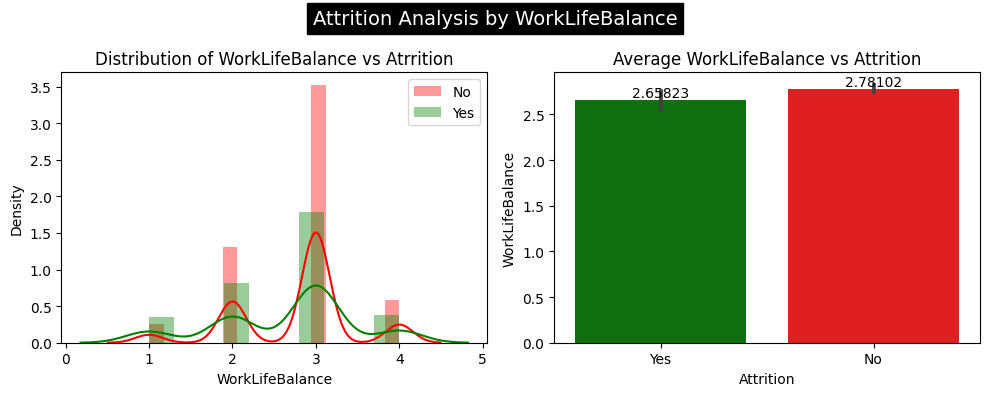

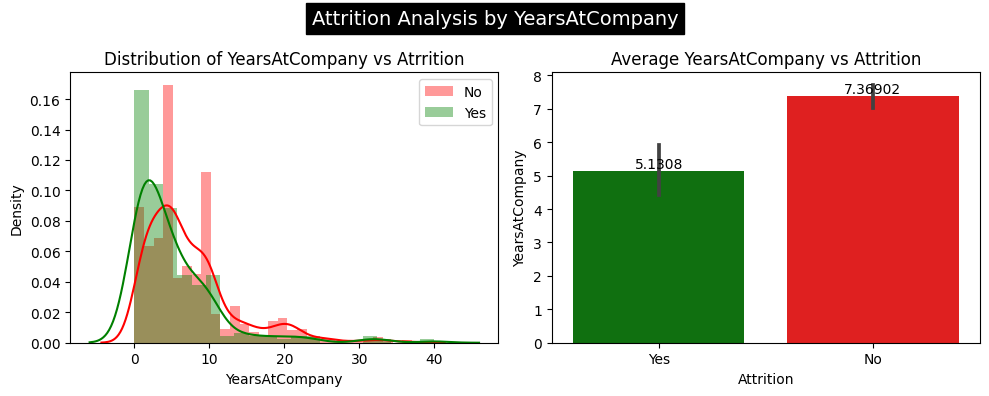

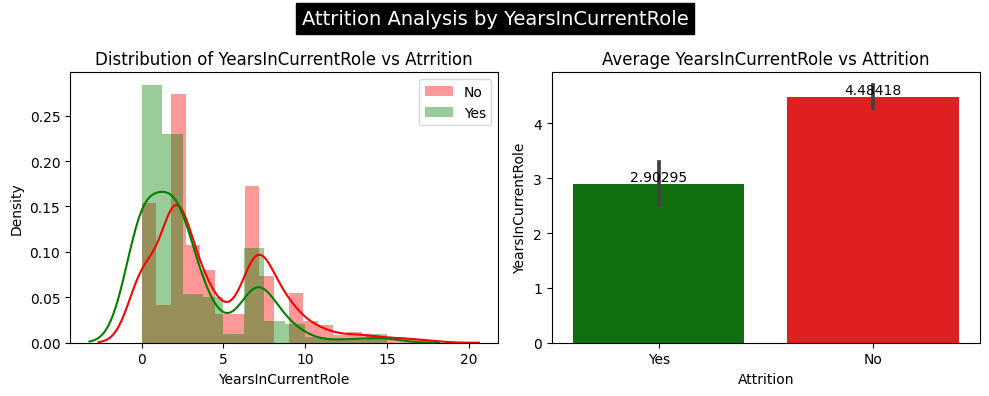

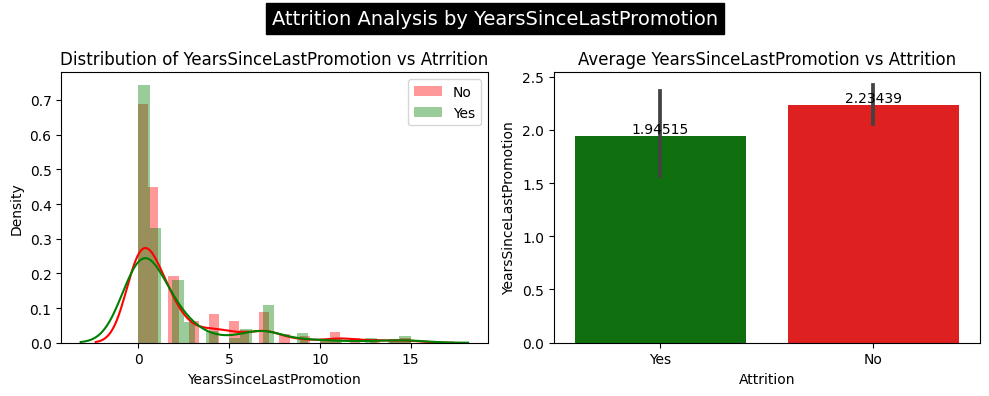

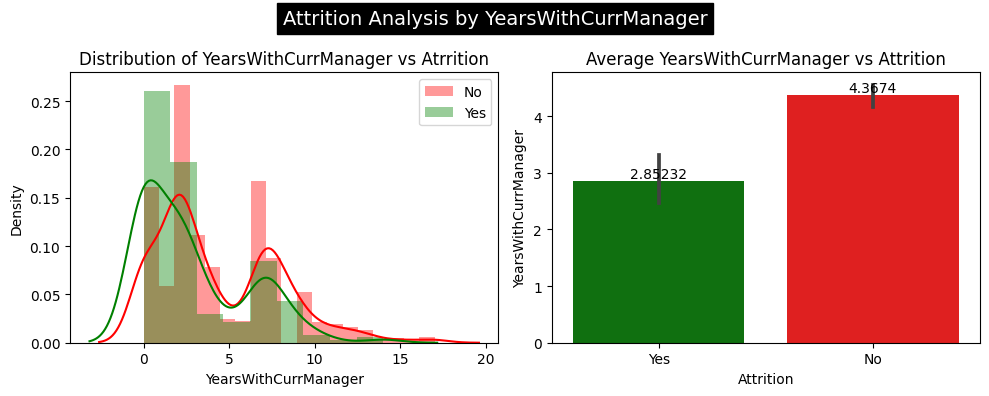

In [24]:
#Visualizing it using it
for i in num_col:
    
    #create Subplots
    fig, axes =plt.subplots(1,2,figsize=(10,4))
    
    # First Plot: Distribution of Numerical columns vs Atrrition
    sns.distplot(df[df['Attrition']=='No'][i], label= "No", color='r', ax=axes[0])
    sns.distplot(df[df['Attrition']=='Yes'][i],label="Yes", color='g', ax=axes[0])
    axes[0].set_title(f"Distribution of {i} vs Atrrition")
    axes[0].legend()
    
    # Second Plot: Avg. Numerical columns vs Attrition
    ax=sns.barplot(x='Attrition', y=i, data=df, palette={'Yes': "g", 'No': "r"}, ax=axes[1])
    for container in ax.containers:
        ax.bar_label(container)
    axes[1].set_title(f'Average {i} vs Attrition')
    
    fig.suptitle(f"Attrition Analysis by {i}", fontsize=14, backgroundcolor='black',color='white')  # Add a specific title for this column
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()
    # Show the plots
    plt.show()

### `Observations:`

1. **Attrition by Age**:
   - For employees who did not leave (No), the attrition rate tends to decrease with age, reaching a peak at 26 years and declining thereafter.
   - For employees who left (Yes), the attrition rate shows a similar trend, with the lowest rate at 52 years.
<br>
<br>
2. **Attrition by DailyRate**:
   - For employees who did not leave, there is no clear pattern based on daily rate, and attrition is generally low.
   - For employees who left, the attrition rate varies widely across different daily rates, with no significant trend.
<br>
<br>
3. **Attrition by DistanceFromHome**:
   - For employees who did not leave, the attrition rate is relatively consistent across various distances from home.
   - For employees who left, the attrition rate is generally higher for those living closer to work (DistanceFromHome = 1).
<br>
<br>
4. **Attrition by Education**:
   - Employees with lower education levels (Education = 1) have a higher attrition rate than those with higher education levels.
   - The attrition rate increases as education level decreases, particularly for employees with Education = 1 and 2.
<br>
<br>
5. **Attrition by EnvironmentSatisfaction**:
   - Employees with lower environment satisfaction ratings have a higher attrition rate, while those with higher satisfaction ratings tend to stay.
<br>
<br>
6. **Attrition by HourlyRate**:
   - The attrition rate does not show a clear trend with hourly rates. It varies widely across different hourly rates for both employees who stayed and those who left.
<br>
<br>
7. **Attrition by JobInvolvement**:
   - Employees with lower job involvement ratings (JobInvolvement = 1) have a higher attrition rate compared to those with higher ratings.
<br>
<br>
8. **Attrition by JobLevel**:
   - The attrition rate tends to decrease as job level increases. Lower-level employees (JobLevel = 1) have a higher attrition rate compared to those at higher levels.
<br>
<br>
9. **Attrition by JobSatisfaction**:
   - Lower job satisfaction ratings correspond to higher attrition rates, with JobSatisfaction = 1 having the highest attrition rate for both groups.
<br>
<br>
10. **Attrition by MonthlyIncome**:
    - Employees with lower monthly incomes tend to have a higher attrition rate.
    - A majority of employees with very high monthly incomes stayed.
<br>
<br>
11. **Attrition by MonthlyRate**:
    - The attrition rate does not show a clear trend with monthly rates. It varies widely across different monthly rates for both employees who stayed and those who left.
<br>
<br>
12. **Attrition by NumCompaniesWorked**:
    - Employees who have worked for fewer companies (NumCompaniesWorked = 0 and 1) have a lower attrition rate, while those who have worked for more companies tend to have a higher attrition rate.
<br>
<br>
13. **Attrition by PercentSalaryHike**:
    - Employees who experienced lower percent salary hikes tend to have higher attrition rates.
    - The attrition rate increases as the percent salary hike decreases.
<br>
<br>
14. **Attrition by PerformanceRating**:
    - There is no significant difference in attrition rates based on performance rating.
<br>
<br>
15. **Attrition by RelationshipSatisfaction**:
    - Employees with lower relationship satisfaction ratings have a higher attrition rate.
<br>
<br>
16. **Attrition by StockOptionLevel**:
    - Employees with no stock options (StockOptionLevel = 0) have a higher attrition rate compared to those with stock options.
<br>
<br>
17. **Attrition by TotalWorkingYears**:
    - Employees with fewer working years have a higher attrition rate.
    - The attrition rate tends to decrease as the total working years increase.
<br>
<br>
18. **Attrition by TrainingTimesLastYear**:
    - Employees who received less training in the last year have a higher attrition rate.
    - As the number of training times increases, the attrition rate decreases.
<br>
<br>
19. **Attrition by WorkLifeBalance**:
    - Employees with lower work-life balance ratings (WorkLifeBalance = 1 and 2) have a higher attrition rate.
<br>
<br>
20. **Attrition by YearsAtCompany**:
    - Employees with fewer years at the company tend to have a higher attrition rate.
    - The attrition rate decreases as the years at the company increase.
<br>
<br>
21. **Attrition by YearsInCurrentRole**:
    - Employees who have been in their current role for a shorter time have a higher attrition rate.
    - The attrition rate tends to decrease as the years in the current role increase.
<br>
<br>
22. **Attrition by YearsSinceLastPromotion**:
    - Employees who have not been promoted for a longer time have a higher attrition rate.
    - The attrition rate decreases for employees who have been more recently promoted.
<br>
<br>
23. **Attrition by YearsWithCurrManager**:
    - Employees with less time working under the current manager have a higher attrition rate.
    - The attrition rate decreases as the years working with the current manager increase.

Overall, the data suggests that several factors, including age, job satisfaction, education level, and work-related factors, play a role in employee attrition. These insights can be valuable for HR and management to make informed decisions and address attrition issues.

### c. Multivariate Analysis

#### i. Attrition by Age & MonthlyIncome

<Figure size 500x1000 with 0 Axes>

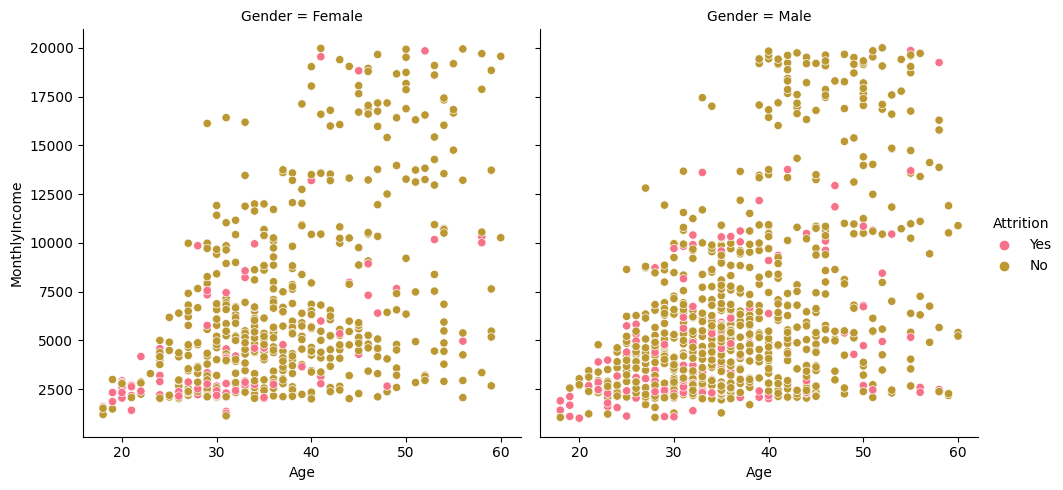

In [25]:
plt.figure(figsize=(5,10))
sns.relplot(data=df, y="MonthlyIncome", x="Age", hue="Attrition",col='Gender')
plt.show()

#### ii. Attrition by Marital Status and Monthly Income

In [26]:
# Comparing MaritalStatus vs MonthlyIncome
print(df.groupby('MaritalStatus')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by MaritalStatus and Monthly Income
stat_income = df.groupby(['Attrition', 'MaritalStatus'])['MonthlyIncome'].mean().reset_index()
print(stat_income)

  MaritalStatus  MonthlyIncome
0      Divorced    6786.287462
1       Married    6793.671620
2        Single    5889.472340 

  Attrition MaritalStatus  MonthlyIncome
0        No      Divorced    7071.455782
1        No       Married    6969.779287
2        No        Single    6401.600000
3       Yes      Divorced    4245.696970
4       Yes       Married    5558.821429
5       Yes        Single    4395.766667


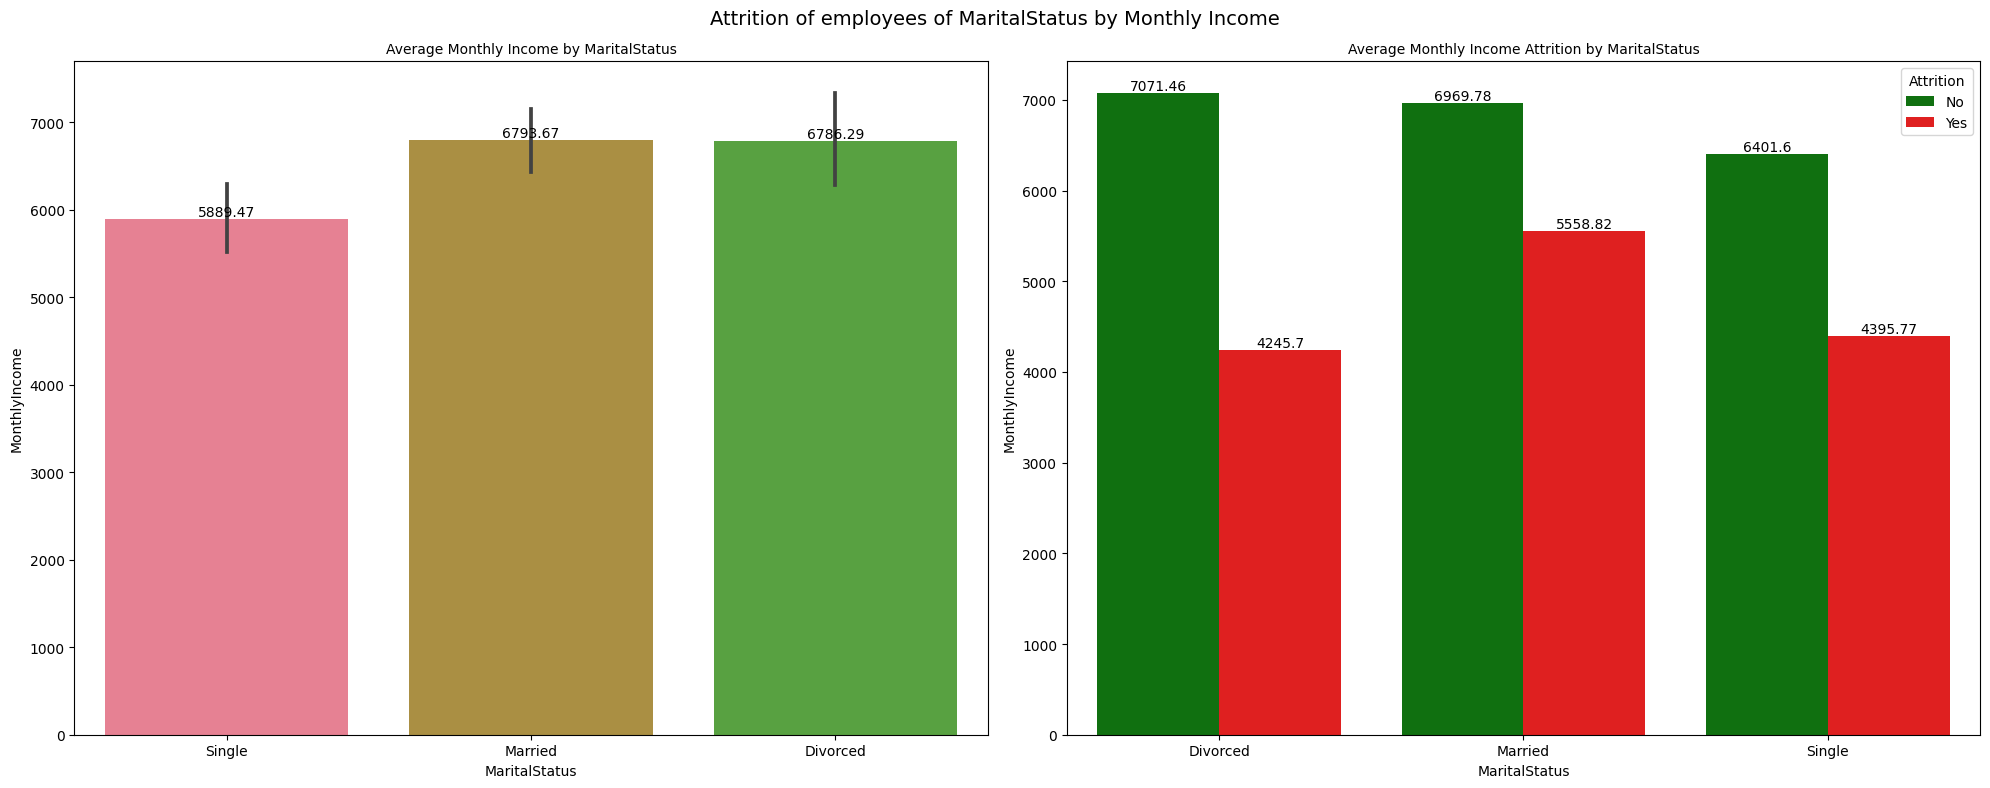

In [27]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing MaritalStatus by Monthly Income
ax = sns.barplot(x='MaritalStatus', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by MaritalStatus', fontsize=10)

# Second Plot: Attrition Rate of MaritalStatus by Salary
ax = sns.barplot(y='MonthlyIncome', x='MaritalStatus', hue='Attrition', data=stat_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by MaritalStatus', fontsize=10)

fig.suptitle("Attrition of employees of MaritalStatus by Monthly Income", fontsize=14)
plt.tight_layout()
plt.show()

### `Observation:`

1. Employees who are "Married" and "Divorced" have similar average monthly incomes, with "Married" employees earning slightly more than "Divorced" employees.

2. Employees with a "Single" marital status have a lower average monthly income compared to "Married" and "Divorced" employees.

3. The attrition rate is lowest among "Married" employees, followed by "Divorced" employees. "Single" employees have the highest attrition rate.

4. Despite having the highest attrition rate, "Single" employees still earn less on average compared to their "Married" and "Divorced" counterparts.

5. Focusing on employee retention and satisfaction among "Single" employees, especially addressing factors contributing to their attrition, may be crucial for improving overall workforce stability.

#### iii. Attrition of Departmentby MonthlyIncome

In [28]:
# Comparing Department vs MonthlyIncome
print(df.groupby('Department')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by Department and Monthly Income
dept_income = df.groupby(['Attrition', 'Department'])['MonthlyIncome'].mean().reset_index()
print(dept_income)

               Department  MonthlyIncome
0         Human Resources    6654.507937
1  Research & Development    6281.252862
2                   Sales    6959.172646 

  Attrition              Department  MonthlyIncome
0        No         Human Resources    7345.980392
1        No  Research & Development    6630.326087
2        No                   Sales    7232.240113
3       Yes         Human Resources    3715.750000
4       Yes  Research & Development    4108.075188
5       Yes                   Sales    5908.456522


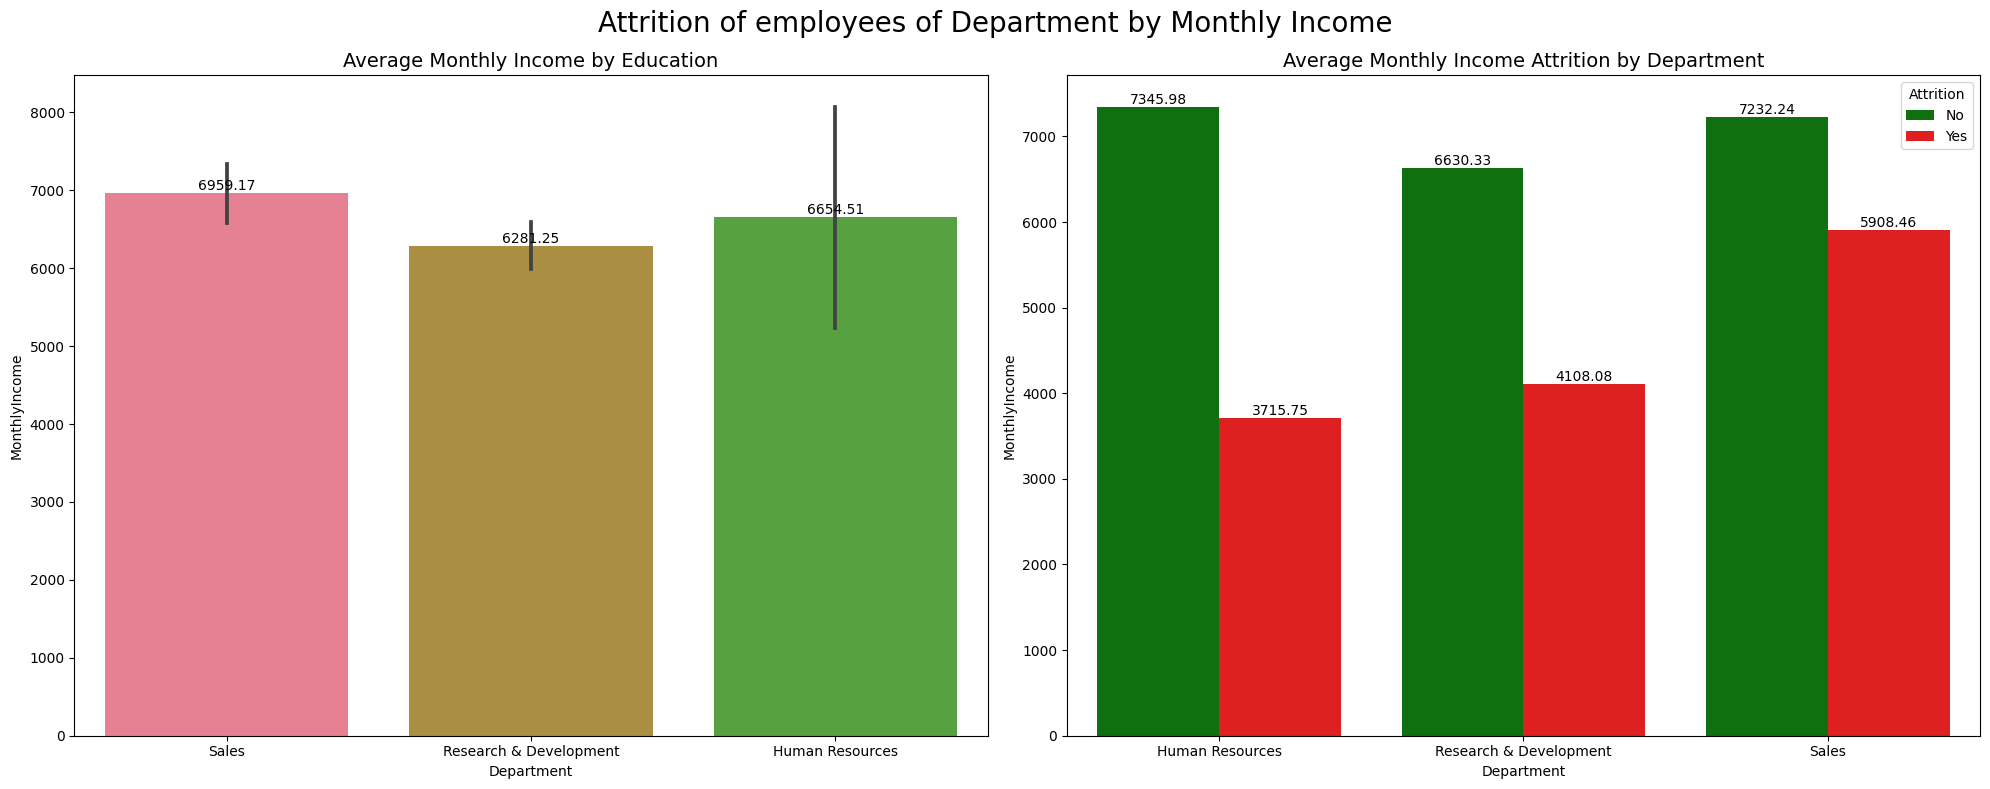

In [29]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing Department by Monthly Income
ax = sns.barplot(x='Department', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Education', fontsize=14)

# Second Plot: Attrition Rate of Department by Salary
ax = sns.barplot(y='MonthlyIncome', x='Department', hue='Attrition', data=dept_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by Department', fontsize=14)

fig.suptitle("Attrition of employees of Department by Monthly Income", fontsize=20)
plt.tight_layout()
plt.show()

### `Observation:`
* "Sales" is the highest-paying department in terms of average monthly income, followed by "Human Resources" and "Research & Development."
* "Sales" department has the highest attrition rate, with a significant percentage of employees responding "Yes" to attrition. "Research & Development" has the lowest attrition rate, with most employees responding "No."
* Despite its high average monthly income, the "Research & Development" department maintains a lower attrition rate compared to the "Sales" department, suggesting good employee retention.
* Focusing on the "Sales" department to understand and address the factors contributing to attrition may be essential for the company's employee retention efforts.

#### iv. Attrition by Education and Monthly Income

In [30]:
# Comparing Education vs MonthlyIncome
print(df.groupby('Education')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobRole and Monthly Income
edu_income = df.groupby(['Attrition', 'Education'])['MonthlyIncome'].mean().reset_index()
print(edu_income )

   Education  MonthlyIncome
0          1    5640.570588
1          2    6226.645390
2          3    6517.263986
3          4    6832.402010
4          5    8277.645833 

  Attrition  Education  MonthlyIncome
0        No          1    5926.129496
1        No          2    6586.058824
2        No          3    6882.919662
3        No          4    7087.814706
4        No          5    8559.906977
5       Yes          1    4360.161290
6       Yes          2    4282.545455
7       Yes          3    4770.242424
8       Yes          4    5335.155172
9       Yes          5    5850.200000


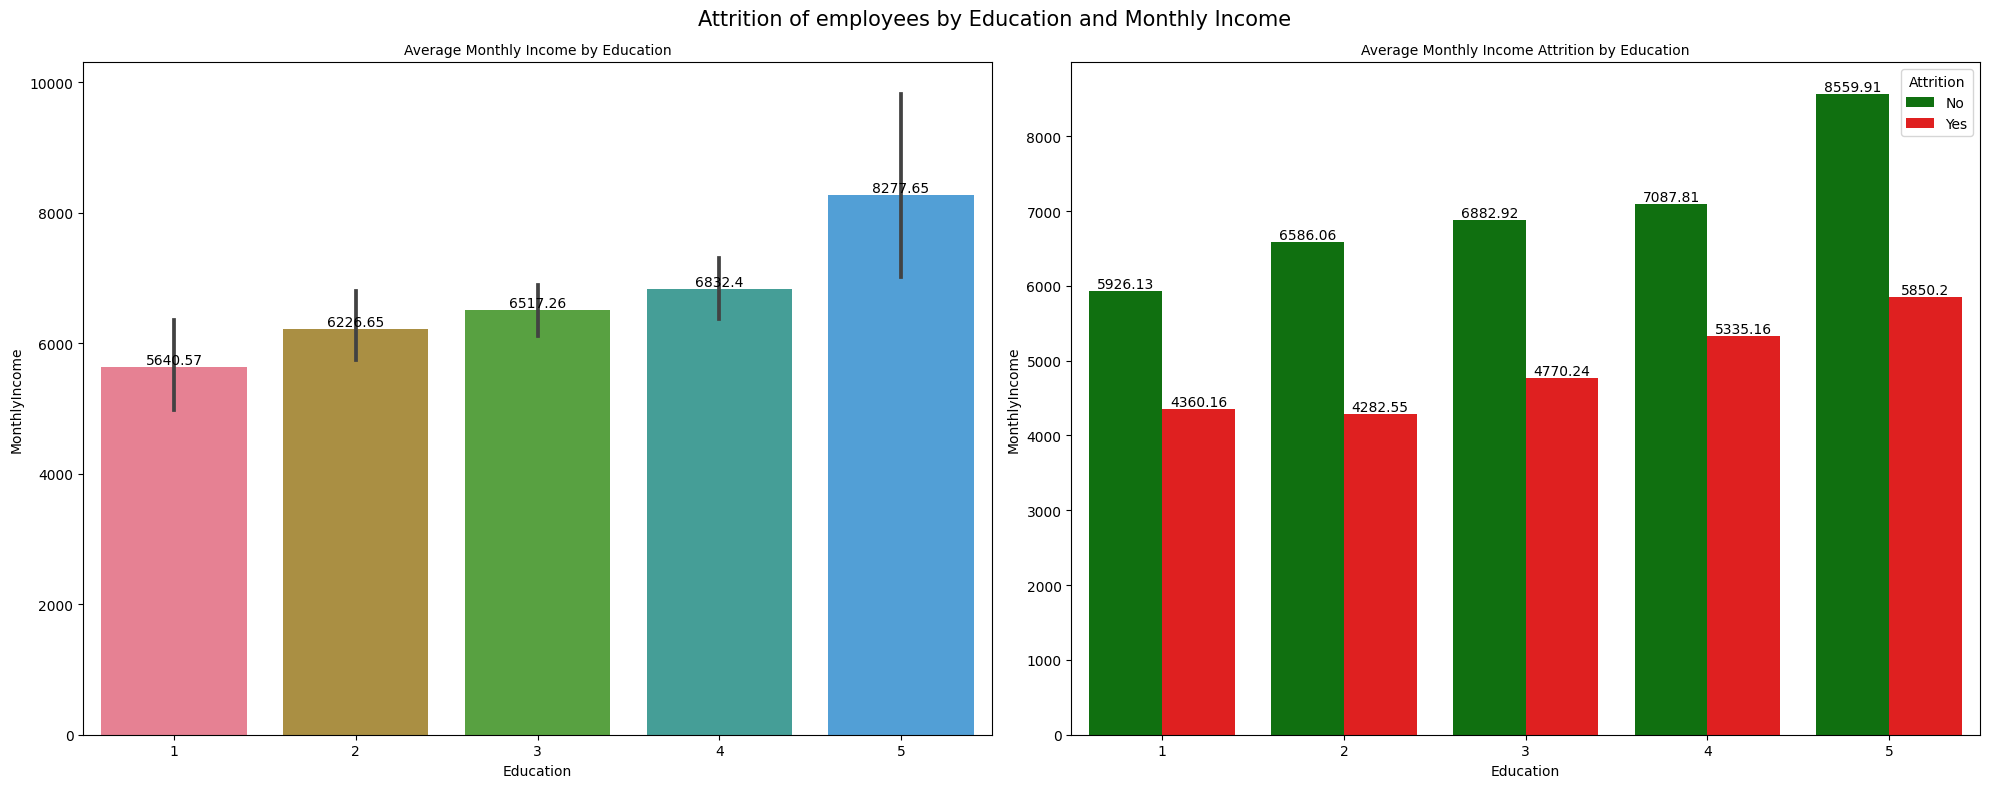

In [31]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing Education by Monthly Income
ax = sns.barplot(x='Education', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Education', fontsize=10)

# Second Plot: Attrition Rate by Education and Salary
ax = sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=edu_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by Education', fontsize=10)

fig.suptitle("Attrition of employees by Education and Monthly Income", fontsize=15)
plt.tight_layout()
plt.show()

### `Observation:`
* Monthly income generally increases with higher education levels, indicating a positive correlation between education and income.
* Employees who have not experienced attrition (Attrition = No) follow this trend, with higher education associated with higher incomes.
* Among employees with attrition (Attrition = Yes), the correlation between education and income is weaker, but the trend is still evident.
* Employees with the highest education level (Education = 5) tend to have the highest monthly incomes, while those with the lowest education (Education = 1) have the lowest incomes.
* Education level appears to influence income, but other factors also play a role in attrition decisions. Further analysis is needed to understand the complete picture.

#### v. Attrition by Job Role and Monthly Income

In [32]:
# Comparing JobRole vs MonthlyIncome
print(df.groupby('JobRole')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobRole and Monthly Income
jobrole_income = df.groupby(['Attrition', 'JobRole'])['MonthlyIncome'].mean().reset_index()
print(jobrole_income)

                     JobRole  MonthlyIncome
0  Healthcare Representative    7528.763359
1            Human Resources    4235.750000
2      Laboratory Technician    3237.169884
3                    Manager   17181.676471
4     Manufacturing Director    7295.137931
5          Research Director   16033.550000
6         Research Scientist    3239.972603
7            Sales Executive    6924.279141
8       Sales Representative    2626.000000 

   Attrition                    JobRole  MonthlyIncome
0         No  Healthcare Representative    7453.557377
1         No            Human Resources    4391.750000
2         No      Laboratory Technician    3337.223350
3         No                    Manager   17201.484536
4         No     Manufacturing Director    7289.925926
5         No          Research Director   15947.346154
6         No         Research Scientist    3328.122449
7         No            Sales Executive    6804.617100
8         No       Sales Representative    2798.440000
9       

In [33]:
# Visualizing it
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # Use plt.subplots to create subplots

# First Plot:Comparing JobRole by Monthly Income
ax= sns.barplot(x='MonthlyIncome', y='JobRole', data=df, ax=axes[0],)
for container in ax.containers:
        ax.bar_label(container)
axes[0].set_title('Average Monthly income by JobRole', fontsize=10)

# Second Plot: Attrition Rate of jobroles by Salary
ax= sns.barplot(y='JobRole', x='MonthlyIncome', hue='Attrition', data=jobrole_income, ax=axes[1],
            palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
        ax.bar_label(container)
axes[1].set_title('Average Monthly Income by JobRole and Attrition',fontsize=10)

fig.suptitle("Attrition of employees by JobRole vs MonthlyIncome", fontsize=14)
plt.tight_layout()
plt.show()

### `Observations:`
* "Manager" roles consistently have the highest monthly incomes, irrespective of attrition status ("No" or "Yes").
* "Sales Representative" roles have the lowest monthly incomes, and attrition tends to have a significant income impact in these roles.
* Attrition often leads to income increases in "Healthcare Representative" and "Manufacturing Director" roles, but it leads to income decreases in "Research Director" and "Research Scientist" positions.
* "Human Resources" and "Laboratory Technician" roles exhibit moderate income levels and are influenced by attrition but not as dramatically as the aforementioned job roles.

#### vi. Attrition by Job Level and Monthly Income

In [34]:
# Comparing JobLevel vs MonthlyIncome
print(df.groupby('JobLevel')['MonthlyIncome'].mean().reset_index(),'\n')

# Attrition of Employees by JobLevel and Monthly Income
joblvl_income = df.groupby(['Attrition', 'JobLevel'])['MonthlyIncome'].mean().reset_index()
print(joblvl_income)

   JobLevel  MonthlyIncome
0         1    2786.915285
1         2    5502.277154
2         3    9817.252294
3         4   15503.783019
4         5   19191.826087 

  Attrition  JobLevel  MonthlyIncome
0        No         1    2854.407500
1        No         2    5474.495851
2        No         3    9891.032258
3        No         4   15620.287129
4        No         5   19170.578125
5       Yes         1    2598.125874
6       Yes         2    5759.788462
7       Yes         3    9388.406250
8       Yes         4   13150.400000
9       Yes         5   19463.800000


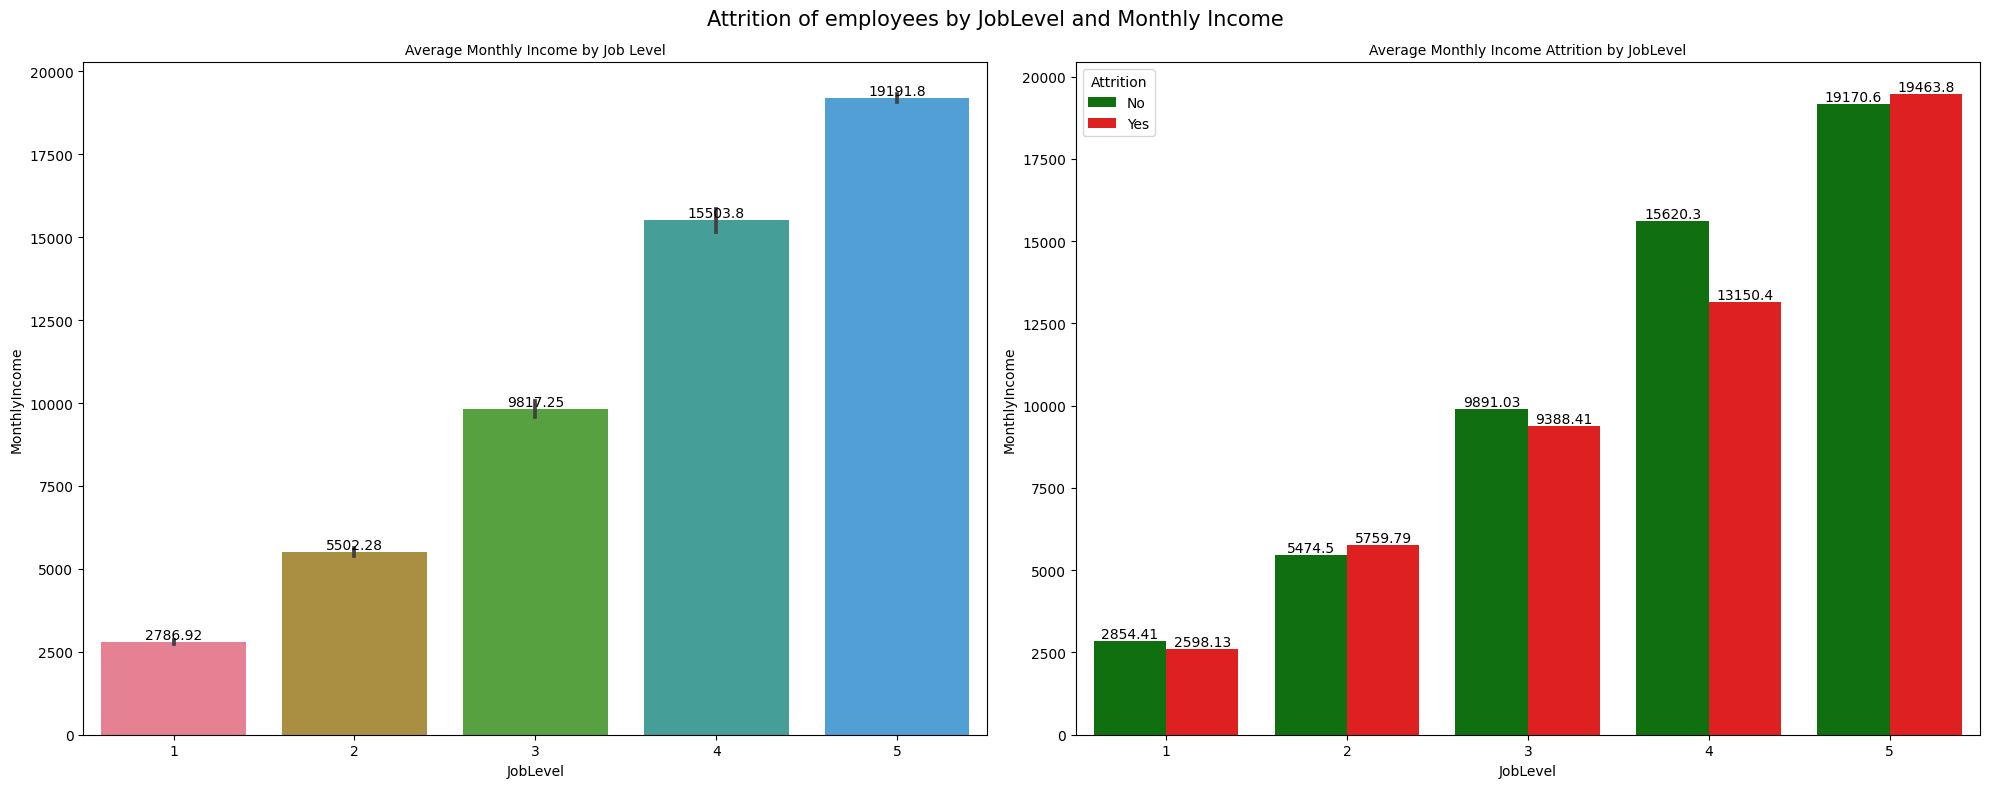

In [35]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First Plot: Comparing JobLevel by Monthly Income
ax = sns.barplot(x='JobLevel', y='MonthlyIncome', data=df, ax=axes[0])
for container in ax.containers:
    ax.bar_label(container)
axes[0].set_title('Average Monthly Income by Job Level', fontsize=10)

# Second Plot: Attrition Rate by Job Level and Salary
ax = sns.barplot(x='JobLevel', y='MonthlyIncome', hue='Attrition', data=joblvl_income, ax=axes[1],
                 palette={'Yes': "red", 'No': "green"})
for container in ax.containers:
    ax.bar_label(container)
axes[1].set_title('Average Monthly Income Attrition by JobLevel', fontsize=10)

fig.suptitle("Attrition of employees by JobLevel and Monthly Income", fontsize=15)
plt.tight_layout()
plt.show()

### `Observations:`
* Monthly incomes tend to rise as job levels increase, indicating a positive correlation between job level and income.
* Employees who stayed with the company (attrition: "No") generally have higher monthly incomes as their job levels increase.
* For employees who left the company (attrition: "Yes"), the relationship is more varied. While some job levels have higher incomes for those who left, others show lower incomes.
* In summary, job level does impact monthly income, but attrition's effect on income varies across different job levels. Other factors may be influencing this relationship.

## 7. Outliers Detection & Treatment

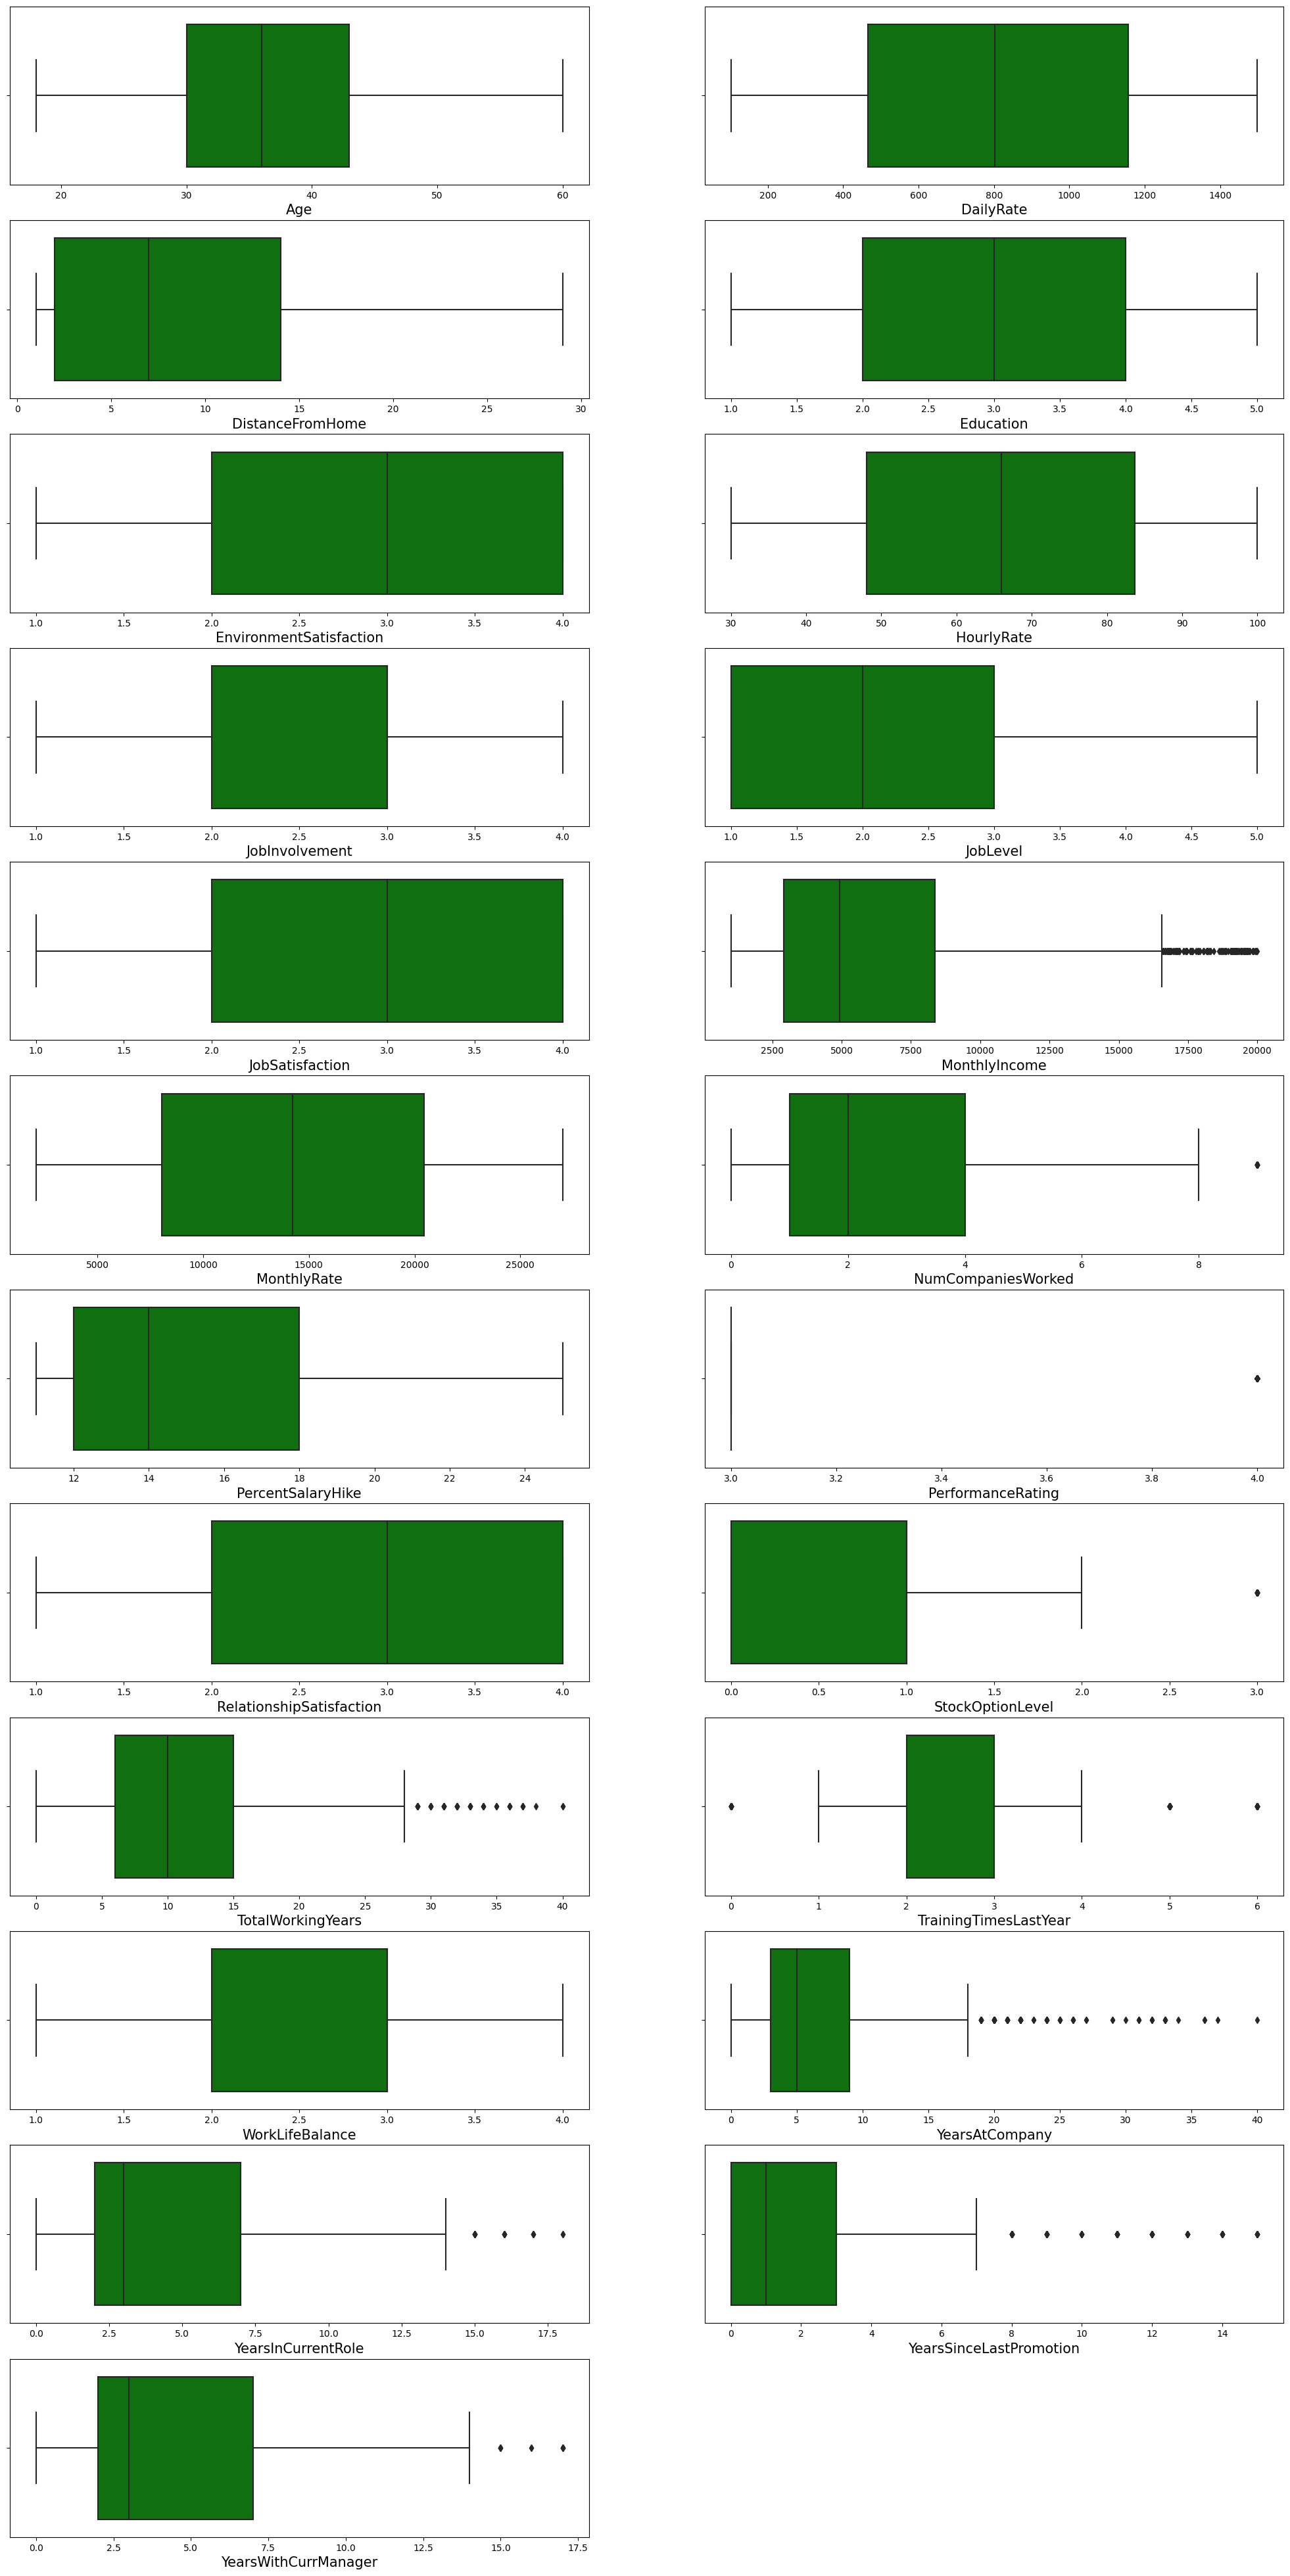

In [36]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in num_col:
    if plotnumber <=23:
        ax = plt.subplot(12,2,plotnumber)
        sns.boxplot(x= column, data=df, color = 'green')
        plt.xlabel(column,fontsize=15)

    plotnumber +=1
plt.show()

### `Observations:`
It appears that some features in the dataset have potential outliers, but let's further investigate to confirm their nature:

1. **MonthlyIncome:** Some high-ranking positions may indeed have significantly higher incomes, so these data points may not be outliers.
<br>
<br>
2. **NumCompaniesWorked:** If someone starts working at a low-profile job at a young age, changing jobs frequently can be expected.
<br>
<br>
3. **PerformanceRating:** This feature does not seem to contain outliers.
<br>
<br>
4. **PercentSalaryHike:** A 25% salary hike might be reasonable for some employees, so it may not be an outlier.
<br>
<br>
5. **TotalWorkingYears:** If a person started working at the age of 18 and has worked consistently until the age of 58, accumulating 18 years of experience, this would not be considered an outlier.
<br>
<br>
6. **StockOptionLevel:** No apparent outliers are observed in this feature.
<br>
<br>
7. **TrainingTimesLastYear:** This feature does not seem to contain outliers.
<br>
<br>
8. **YearsAtCompany:** No significant outliers appear to be present.
<br>
<br>
9. **YearsInCurrentRole:** Most people do not have 20 years of experience in their current role, so this does not appear to be an outlier.
<br>
<br>
10. **YearsSinceLastPromotion:** Since this is a categorical feature, it cannot be considered an outlier.
<br>
<br>
11. **YearsWithCurrManager:** If a person has spent more than 16 years at the same company, having 16 years with the current manager might not be an outlier.

In summary, based on the analysis, there don't appear to be any substantial outliers in the dataset.

## 8. Skewness Detection & Treatment

In [37]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

### Treating Skewness

In [38]:
# Create a new DataFrame with only the numerical columns
numerical_data = df[num_col]

# Initialize the PowerTransformer with 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the numerical data
numerical_data_transformed = pt.fit_transform(numerical_data)

# Create a new DataFrame with the transformed numerical data
numerical_data_transformed_df = pd.DataFrame(numerical_data_transformed, columns=num_col)

# Update the original DataFrame with the transformed numerical columns
df[num_col] = numerical_data_transformed_df
df

Age Attrition     BusinessTravel  DailyRate  \
0     0.522140       Yes      Travel_Rarely   0.759289   
1     1.276411        No  Travel_Frequently  -1.334597   
2     0.102091       Yes      Travel_Rarely   1.340365   
3    -0.353971        No  Travel_Frequently   1.379936   
4    -1.123755        No      Travel_Rarely  -0.453941   
...        ...       ...                ...        ...   
1465 -0.008279        No  Travel_Frequently   0.264672   
1466  0.316210        No      Travel_Rarely  -0.397219   
1467 -1.123755        No      Travel_Rarely  -1.751713   
1468  1.276411        No  Travel_Frequently   0.583235   
1469 -0.236188        No      Travel_Rarely  -0.358845   

                  Department  DistanceFromHome  Education EducationField  \
0                      Sales         -1.494085  -0.916940  Life Sciences   
1     Research & Development          0.243416  -1.771185  Life Sciences   
2     Research & Development         -1.031215  -0.916940          Other   
3     Research & Development         -0.700347   1.082871  Life Sciences   
4     Research & Development         -1.031215  -1.771185        Medical   
...                      ...               ...        ...            ...   
1465  Research & Development          1.407126  -0.916940        Medical   
1466  Research & Development         -0.050827  -1.771185        Medical   
1467  Research & Development         -0.442291   0.040522  Life Sciences   
1468                   Sales         -1.031215   0.040522        Medical   
1469  Research & Development          0.243416   0.040522        Medical   

      EnvironmentSatisfaction  Gender  ...  PerformanceRating  \
0                   -0.706596  Female  ...      -7.632783e-17   
1                    0.208597    Male  ...       4.232725e-16   
2                    1.209516    Male  ...      -7.632783e-17   
3                    1.209516  Female  ...      -7.632783e-17   
4                   -1.518118    Male  ...      -7.632783e-17   
...                       ...     ...  ...                ...   
1465                 0.208597    Male  ...      -7.632783e-17   
1466                 1.209516    Male  ...      -7.632783e-17   
1467                -0.706596    Male  ...       4.232725e-16   
1468                 1.209516    Male  ...      -7.632783e-17   
1469                -0.706596    Male  ...      -7.632783e-17   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                    -1.529513         -1.087933         -0.244305   
1                     1.229016          0.548969          0.052495   
2                    -0.700130         -1.087933         -0.410500   
3                     0.225164         -1.087933         -0.244305   
4                     1.229016          0.548969         -0.592063   
...                        ...               ...               ...   
1465                  0.225164          0.548969          0.859893   
1466                 -1.529513          0.548969         -0.090665   
1467                 -0.700130          0.548969         -0.592063   
1468                  1.229016         -1.087933          0.859893   
1469                 -1.529513         -1.087933         -0.592063   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 -2.579073       -2.144446        0.139692   
1                  0.217384        0.276821        0.762660   
2                  0.217384        0.276821       -2.229592   
3                  0.217384        0.276821        0.482432   
4                  0.217384        0.276821       -0.951540   
...                     ...             ...             ...   
1465               0.217384        0.276821       -0.066114   
1466               1.615639        0.276821        0.320677   
1467              -2.579073        0.276821        0.139692   
1468               0.217384       -1.108624        0.628829   
1469               0.217384        1.998177       -0.305280   

      YearsInCurrentRo

In [39]:
# After removing skewness checking the data
df.skew()

Age                        -0.007603
DailyRate                  -0.196160
DistanceFromHome           -0.007468
Education                  -0.099881
EnvironmentSatisfaction    -0.205395
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobSatisfaction            -0.212815
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
YearsWithCurrManager       -0.067565
dtype: float64

### `Observation:`

It appears that we have successfully reduced skewness in our dataset using the PowerTransformer technique. However, it's important to note that we haven't applied skewness reduction to columns such as NumCompaniesWorked, JobLevel, and PerformanceRating because they contain categorical values and not continuous numerical data. Skewness reduction techniques are typically applied to continuous numerical variables, and categorical variables require different methods of preprocessing.

## Feature Engineering

In [40]:
#convert category attributes with only 2 distinct values to numeric

# Define a dictionary for replacing 'yes' and 'no'
yes_no_mapping = {'Yes': 1, 'No': 0}

# Replace values in the specified columns
columns_to_replace = ['Attrition', 'OverTime']
df[columns_to_replace] = df[columns_to_replace].replace(yes_no_mapping)

In [41]:
#convert category attributes with more than 2 distinct values to numeric using label encoder

le=LabelEncoder()
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df['Department']=le.fit_transform(df['Department'])
df['EducationField']=le.fit_transform(df['EducationField'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['MaritalStatus']=le.fit_transform(df['MaritalStatus'])

In [42]:
df

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.522140          1               2   0.759289           2   
1     1.276411          0               1  -1.334597           1   
2     0.102091          1               2   1.340365           1   
3    -0.353971          0               1   1.379936           1   
4    -1.123755          0               2  -0.453941           1   
...        ...        ...             ...        ...         ...   
1465 -0.008279          0               1   0.264672           1   
1466  0.316210          0               2  -0.397219           1   
1467 -1.123755          0               2  -1.751713           1   
1468  1.276411          0               1   0.583235           2   
1469 -0.236188          0               2  -0.358845           1   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0            -1.494085  -0.916940               1                -0.706596   
1             0.243416  -1.771185               1                 0.208597   
2            -1.031215  -0.916940               4                 1.209516   
3            -0.700347   1.082871               1                 1.209516   
4            -1.031215  -1.771185               3                -1.518118   
...                ...        ...             ...                      ...   
1465          1.407126  -0.916940               3                 0.208597   
1466         -0.050827  -1.771185               3                 1.209516   
1467         -0.442291   0.040522               1                -0.706596   
1468         -1.031215   0.040522               3                 1.209516   
1469          0.243416   0.040522               3                -0.706596   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0          0  ...      -7.632783e-17                 -1.529513   
1          1  ...       4.232725e-16                  1.229016   
2          1  ...      -7.632783e-17                 -0.700130   
3          0  ...      -7.632783e-17                  0.225164   
4          1  ...      -7.632783e-17                  1.229016   
...      ...  ...                ...                       ...   
1465       1  ...      -7.632783e-17                  0.225164   
1466       1  ...      -7.632783e-17                 -1.529513   
1467       1  ...       4.232725e-16                 -0.700130   
1468       1  ...      -7.632783e-17                  1.229016   
1469       1  ...      -7.632783e-17                 -1.529513   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -1.087933          -0.244305              -2.579073   
1             0.548969           0.052495               0.217384   
2            -1.087933          -0.410500               0.217384   
3            -1.087933          -0.244305               0.217384   
4             0.548969          -0.592063               0.217384   
...                ...                ...                    ...   
1465          0.548969           0.859893               0.217384   
1466          0.548969          -0.090665               1.615639   
1467          0.548969          -0.592063              -2.579073   
1468         -1.087933           0.859893               0.217384   
1469         -1.087933          -0.592063               0.217384   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.144446        0.139692            0.205562   
1            0.276821        0.762660            0.883888   
2            0.276821       -2.229592           -1.596434   
3            0.276821        0.482432            0.883888   
4            0.276821       -0.951540           -0.446645   
...               ...             ...                 ...   
1465         0.276821       -0.066114           -0.446645   
1466         0.276821        0.320677            0.883888   
1467         0.276821        0.139692           -0.446645   
1468        -1.108624        0.628829

## Correlation Matrix

### a. Correlation with Features

In [43]:
df_cor =df.corr()
df_cor 

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.175766        0.020647   0.008698   
Attrition                -0.175766   1.000000        0.000074  -0.055923   
BusinessTravel            0.020647   0.000074        1.000000  -0.005556   
DailyRate                 0.008698  -0.055923       -0.005556   1.000000   
Department               -0.031494   0.063991       -0.009044   0.008348   
DistanceFromHome         -0.020217   0.078213       -0.008813  -0.006339   
Education                 0.222197  -0.032267        0.000011  -0.015889   
EducationField           -0.047321   0.026846        0.023724   0.037126   
EnvironmentSatisfaction   0.010458  -0.100234        0.003821   0.018745   
Gender                   -0.034937   0.029453       -0.032981  -0.009390   
HourlyRate                0.024993  -0.006390        0.026190   0.024923   
JobInvolvement            0.026648  -0.125068        0.035447   0.039882   
JobLevel                  0.492901  -0.195593        0.001070   0.002658   
JobRole                  -0.125189   0.067151        0.002724  -0.007065   
JobSatisfaction          -0.005163  -0.103241       -0.032250   0.032726   
MaritalStatus            -0.108161   0.162070        0.024001  -0.071117   
MonthlyIncome             0.498725  -0.205608        0.029114   0.013757   
MonthlyRate               0.020052   0.014483       -0.013581  -0.033383   
NumCompaniesWorked        0.330170   0.037554        0.026800   0.038445   
OverTime                  0.023349   0.246118        0.016543   0.008809   
PercentSalaryHike         0.003089  -0.022524       -0.033243   0.024132   
PerformanceRating         0.000396   0.002889       -0.026341   0.000446   
RelationshipSatisfaction  0.049067  -0.044479       -0.036768   0.009514   
StockOptionLevel          0.074398  -0.174368       -0.015461   0.041513   
TotalWorkingYears         0.688330  -0.214827        0.036349   0.020035   
TrainingTimesLastYear    -0.017274  -0.061284        0.016732   0.001518   
WorkLifeBalance          -0.019839  -0.053285       -0.012884  -0.040560   
YearsAtCompany            0.296016  -0.193406       -0.011451  -0.012831   
YearsInCurrentRole        0.214870  -0.182921       -0.021166   0.010738   
YearsSinceLastPromotion   0.181112  -0.054479       -0.029513  -0.038267   
YearsWithCurrManager      0.205007  -0.182957       -0.018747  -0.003915   

                          Department  DistanceFromHome  Education  \
Age                        -0.031494         -0.020217   0.222197   
Attrition                   0.063991          0.078213  -0.032267   
BusinessTravel             -0.009044         -0.008813   0.000011   
DailyRate                   0.008348         -0.006339  -0.015889   
Department                  1.000000          0.028139   0.008793   
DistanceFromHome            0.028139          1.000000   0.018890   
Education                   0.008793          0.018890   1.000000   
EducationField              0.013720          0.008463  -0.039579   
EnvironmentSatisfaction    -0.019616         -0.010807  -0.027374   
Gender                     -0.041583          0.007120  -0.015405   
HourlyRate                 -0.003944          0.018471   0.017171   
JobInvolvement             -0.026119          0.032466   0.042076   
JobLevel                    0.178386          0.020035   0.117368   
JobRole                     0.662431          0.009334   0.004846   
JobSatisfaction             0.022138         -0.012649  -0.009120   
MaritalStatus               0.056073         -0.023492   0.004777   
MonthlyIncome               0.136079         -0.002118   0.125997   
MonthlyRate                 0.023434          0.038934  -0.025959   
NumCompaniesWorked         -0.029833         -0.006354   0.131599   
OverTime                    0.007481          0.037156  -0.018418   
PercentSalaryHike          -0.003053          0.031207   0.000361   
PerformanceRating          -0.024604          0.011620  -0.023231   
Relationshi

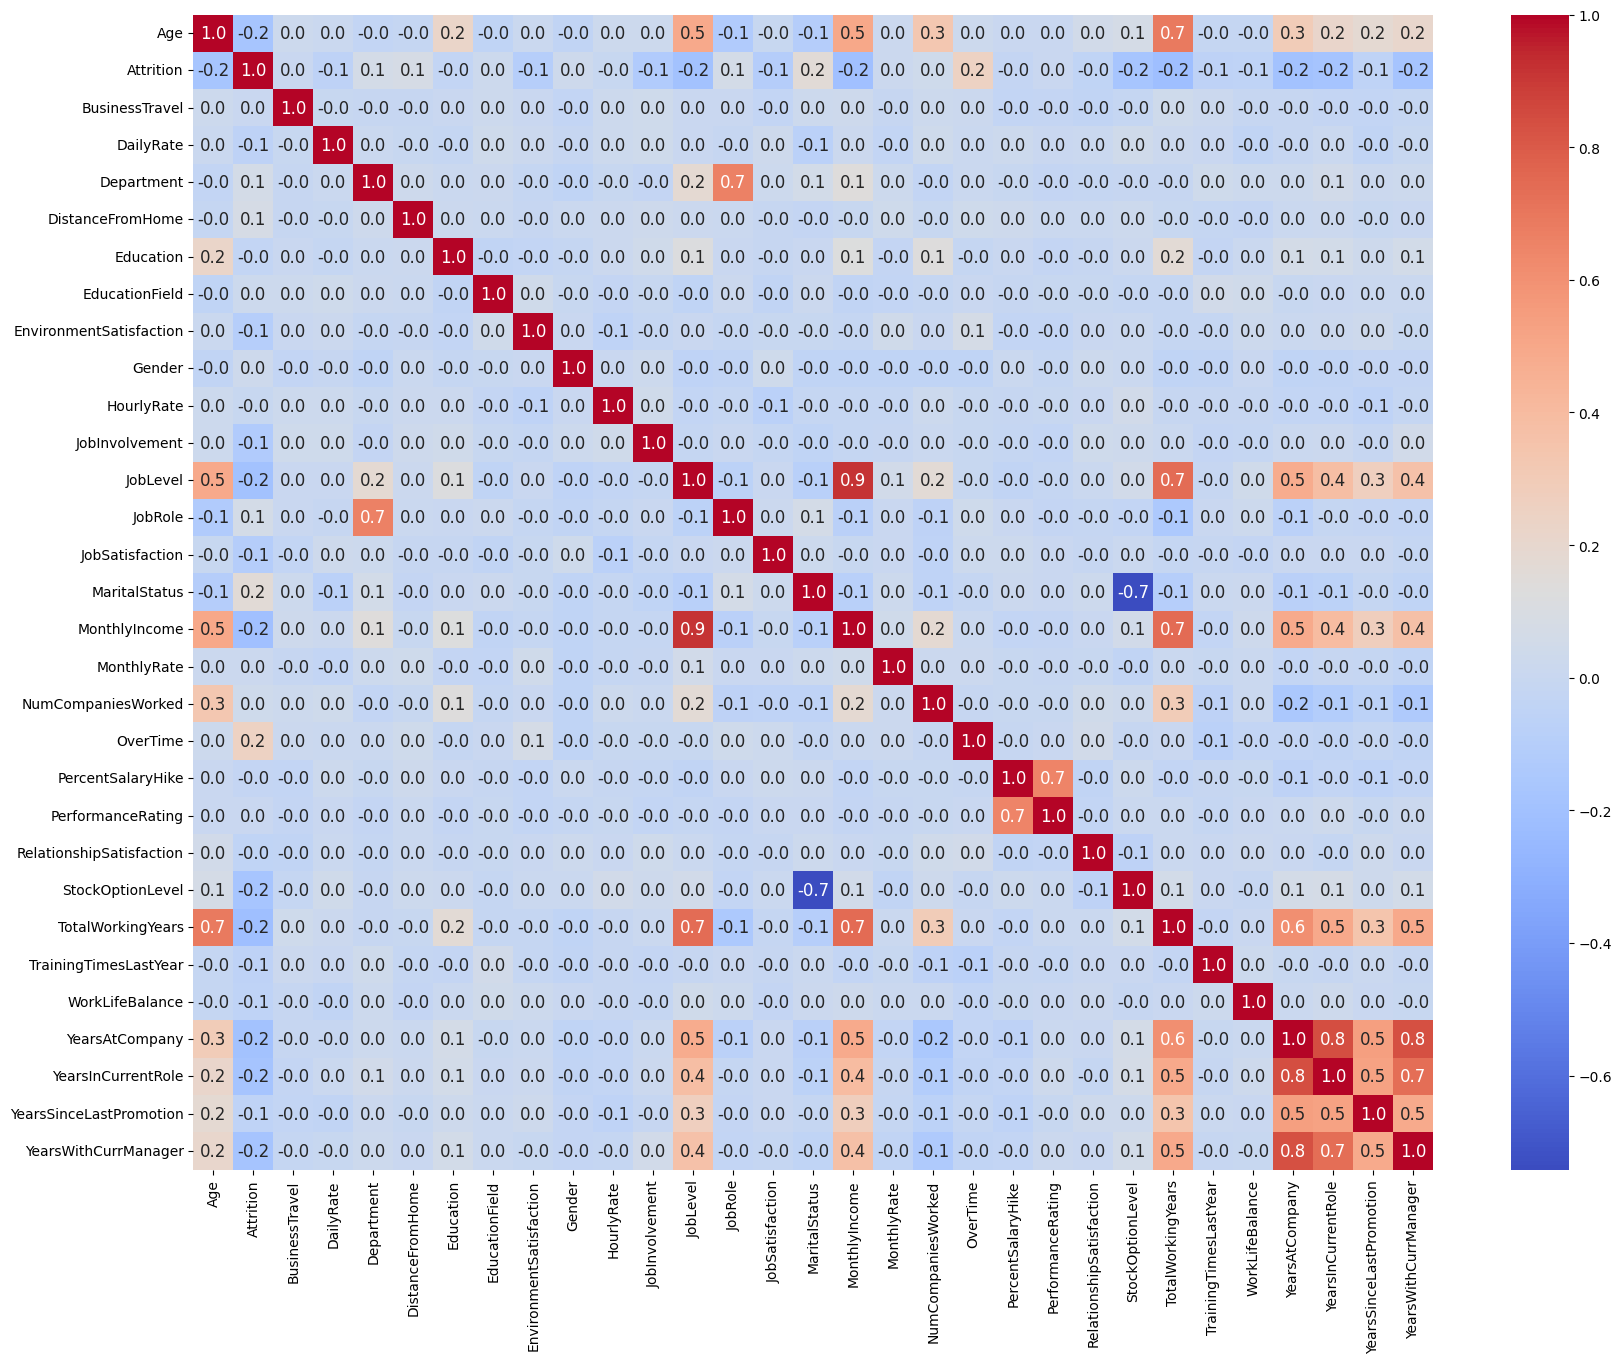

In [44]:
#visualizing it
plt.figure(figsize=(20, 15))
sns.heatmap(df_cor, annot=True, fmt='.1F', cmap='coolwarm', annot_kws={"size": 12})
plt.show()

### `Observations:`

1. **Age & Total Working Years**: There is a strong positive correlation (0.68) between 'Age' and 'Total Working Years,' indicating that as employees get older, they tend to have more total working years.

2. **Job Level & Monthly Income**: 'Job Level' and 'Monthly Income' are positively correlated (0.51), which suggests that as job levels increase, monthly income tends to rise as well.

3. **Monthly Income & Total Working Years**: 'Monthly Income' is positively correlated (0.77) with 'Total Working Years,' indicating that more experienced employees tend to have higher monthly incomes.

4. **Age & YearsAtCompany**: 'Age' is positively correlated (0.31) with 'Years at Company,' indicating that older employees tend to stay longer with the same company.

5. **Job Role & Department**: 'Job Role' and 'Department' show a strong positive correlation (0.66), implying that specific job roles are closely related to certain departments.

6. **Job Satisfaction & Environment Satisfaction**: 'Job Satisfaction' and 'Environment Satisfaction' have a negative correlation (-0.03), which suggests that as job satisfaction decreases, environmental satisfaction also tends to decrease slightly.

7. **Attrition & Age**: 'Attrition' is negatively correlated (-0.16) with 'Age,' implying that younger employees are more likely to leave the company.

8. **Work-Life Balance & Years With Current Manager**: 'Work-Life Balance' and 'Years With Current Manager' are positively correlated (0.05), suggesting that employees with better work-life balance tend to stay longer with the same manager.

9. **Gender & Performance Rating**: There is a small negative correlation (-0.01) between 'Gender' and 'Performance Rating,' but the correlation is very weak.

10. **Monthly Income & Performance Rating**: 'Monthly Income' has a slight negative correlation with 'Performance Rating' (-0.02), indicating that higher income doesn't necessarily lead to a higher performance rating.

In [45]:
#columns which are highly correlated with each other
correlation_threshold = 0.8
mask = df_cor.abs() >= correlation_threshold

features_to_drop = set()

for i in range(len(df_cor.columns)):
    for j in range(i+1, len(df_cor.columns)):
        if mask.iloc[i, j]:
            colname_i = df_cor.columns[i]
            colname_j = df_cor.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [46]:
features_to_drop

{'MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager'}

In [47]:
df.drop(columns=['MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager'],axis=1, inplace=True)

### `Observations:`
I have developed a function to identify columns that exhibit a high correlation of 80% or more with each other. This analysis revealed that 'MonthlyIncome','YearsInCurrentRole', 'YearsWithCurrManager' is such column, and as a result, we have decided to exclude this particular column from the dataset.

### b. Checking Correlation with Target Column

In [48]:
#correlation with target column
correlation_with_target = df.corr()['Attrition'].abs().sort_values(ascending=False)
print(correlation_with_target)

Attrition                   1.000000
OverTime                    0.246118
TotalWorkingYears           0.214827
JobLevel                    0.195593
YearsAtCompany              0.193406
Age                         0.175766
StockOptionLevel            0.174368
MaritalStatus               0.162070
JobInvolvement              0.125068
JobSatisfaction             0.103241
EnvironmentSatisfaction     0.100234
DistanceFromHome            0.078213
JobRole                     0.067151
Department                  0.063991
TrainingTimesLastYear       0.061284
DailyRate                   0.055923
YearsSinceLastPromotion     0.054479
WorkLifeBalance             0.053285
RelationshipSatisfaction    0.044479
NumCompaniesWorked          0.037554
Education                   0.032267
Gender                      0.029453
EducationField              0.026846
PercentSalaryHike           0.022524
MonthlyRate                 0.014483
HourlyRate                  0.006390
PerformanceRating           0.002889
B

In [49]:
df.drop(columns=['PerformanceRating' , 'HourlyRate','BusinessTravel'],axis=1, inplace=True)

In [50]:
df.shape

(1470, 25)

### `Observations:`

When assessing the correlation between our target column and the features, it became evident that 'PerformanceRating,' 'HourlyRate,' and 'BusinessTravel' exhibited very low correlation with the target column. As a result, we have opted to eliminate these columns from our dataset. Consequently, we now have a dataset with 1,470 rows and 25 columns.

## Data Preprocessing

In [51]:
# Separating feature & Label

# Feature
x = df.drop(columns=["Attrition"])

# Target
y= df["Attrition"]

In [52]:
x.shape,y.shape

((1470, 24), (1470,))

### `Observations:`
We have effectively split the dataset into features and labels. Initially, our training dataset had dimensions (1470, 25). Now, with 'X' containing all the features, the shape of 'X' is (1470, 24), while 'y' contains our target variable, resulting in a shape of (1470,).

## Feature Scaling

In [53]:
# Instantiate the Standard Scaler
scaler = StandardScaler()

# Fit and transform the scaler on the features
x_scaled = scaler.fit_transform(x)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
scaled_df

Age  DailyRate  Department  DistanceFromHome  Education  \
0     0.522140   0.759289    1.401512         -1.494085  -0.916940   
1     1.276411  -1.334597   -0.493817          0.243416  -1.771185   
2     0.102091   1.340365   -0.493817         -1.031215  -0.916940   
3    -0.353971   1.379936   -0.493817         -0.700347   1.082871   
4    -1.123755  -0.453941   -0.493817         -1.031215  -1.771185   
...        ...        ...         ...               ...        ...   
1465 -0.008279   0.264672   -0.493817          1.407126  -0.916940   
1466  0.316210  -0.397219   -0.493817         -0.050827  -1.771185   
1467 -1.123755  -1.751713   -0.493817         -0.442291   0.040522   
1468  1.276411   0.583235    1.401512         -1.031215   0.040522   
1469 -0.236188  -0.358845   -0.493817          0.243416   0.040522   

      EducationField  EnvironmentSatisfaction    Gender  JobInvolvement  \
0          -0.937414                -0.706596 -1.224745        0.326033   
1          -0.937414                 0.208597  0.816497       -1.058710   
2           1.316673                 1.209516  0.816497       -1.058710   
3          -0.937414                 1.209516 -1.224745        0.326033   
4           0.565311                -1.518118  0.816497        0.326033   
...              ...                      ...       ...             ...   
1465        0.565311                 0.208597  0.816497        2.014107   
1466        0.565311                 1.209516  0.816497       -1.058710   
1467       -0.937414                -0.706596  0.816497        2.014107   
1468        0.565311                 1.209516  0.816497       -1.058710   
1469        0.565311                -0.706596  0.816497        2.014107   

      JobLevel  ...  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0     0.241622  ...            1.621331  1.591746          -1.488918   
1     0.241622  ...           -0.571302 -0.628241           1.679689   
2    -1.170135  ...            1.271339  1.591746           0.201133   
3    -1.170135  ...           -0.571302  1.591746          -1.488918   
4    -1.170135  ...            1.766182 -0.628241          -0.948760   
...        ...  ...                 ...       ...                ...   
1465  0.241622  ...            0.792695 -0.628241           0.719724   
1466  1.009822  ...            0.792695 -0.628241           0.201133   
1467  0.241622  ...           -0.571302  1.591746           1.281630   
1468  0.241622  ...            0.043423 -0.628241          -0.121307   
1469  0.241622  ...            0.043423 -0.628241          -0.948760   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                    -1.529513         -1.087933          -0.244305   
1                     1.229016          0.548969           0.052495   
2                    -0.700130         -1.087933          -0.410500   
3                     0.225164         -1.087933          -0.244305   
4                     1.229016          0.548969          -0.592063   
...                        ...               ...                ...   
1465                  0.225164          0.548969           0.859893   
1466                 -1.529513          0.548969          -0.090665   
1467                 -0.700130          0.548969          -0.592063   
1468                  1.229016         -1.087933           0.859893   
1469                 -1.529513         -1.087933          -0.592063   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.579073        -2.144446        0.139692   
1                  0.217384         0.276821        0.762660   
2                  0.217384         0.276821       -2.229592   
3                  0.217384         0.276821        0.482432   
4                  0.217384         0.276821       -0.951540   
...                     ...              ...             ...   
1465               0.217384         0.276821       -0.066114   
1466               1.615639         0.2

In [54]:
VIF= pd.DataFrame()
VIF['features']= scaled_df.columns
VIF['vif']=[variance_inflation_factor(scaled_df.values,i) for i in range(len(scaled_df.columns))]

In [55]:
VIF

features       vif
0                        Age  2.085575
1                  DailyRate  1.018709
2                 Department  2.011689
3           DistanceFromHome  1.011011
4                  Education  1.067159
5             EducationField  1.016888
6    EnvironmentSatisfaction  1.016702
7                     Gender  1.019578
8             JobInvolvement  1.012407
9                   JobLevel  2.470447
10                   JobRole  1.911346
11           JobSatisfaction  1.012464
12             MaritalStatus  2.294006
13               MonthlyRate  1.017714
14        NumCompaniesWorked  1.413041
15                  OverTime  1.027207
16         PercentSalaryHike  1.013525
17  RelationshipSatisfaction  1.019070
18          StockOptionLevel  2.260367
19         TotalWorkingYears  4.669538
20     TrainingTimesLastYear  1.018571
21           WorkLifeBalance  1.013631
22            YearsAtCompany  2.474772
23   YearsSinceLastPromotion  1.418528

### `Observations:`
Most of the features have low VIF values, indicating a lack of multicollinearity. However, careful consideration is needed when dealing with TotalWorkingYears in predictive modeling, as their higher VIF values suggest potential multicollinearity with other predictors.

## Handling Imbalanced Data

In [56]:
# Checking unique values of our target

y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [57]:
# Balance the Class distribution
sm=SMOTE()
x,y=sm.fit_resample(x_scaled,y)

In [58]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

### `Observations:`

We have already handle the imbalance data now we have equal values for attrition counts.

## Modelling Selection

### a. Best Random State

In [59]:
#Choosing the Best Random State:
maxaccu=0
maxRS=0

for i in range(0,50):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.8137651821862348 on Random State = 4


### b. Splitting Data for Train & Test

In [60]:
#Splitting Data for train & Test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

In [61]:
# Initialize all the models
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

# Create a list of models for iteration
models = [
    (LR_model, "Logistic Regression"),
    (RD_model, "Ridge Classifier"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (XGB_model, "XGBoost Classifier"),
    (SGH_model, "SGD Classifier"),
    (Bag_model, "Bagging Classifier"),
    (ADA_model, "AdaBoost Classifier"),
    (GB_model, "Gradient Boosting Classifier")
]

### c. Model Evaluation

In [62]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in models:
    cross_val_scores = cross_val_score(model, x, y, cv=5)  # Adjust the number of folds as needed
    mean_accuracy = np.mean(cross_val_scores)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Add precision, recall, F1-score, and support as separate columns
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    model_performance = {
        "Model": model_name,
        "Cross-Validation Mean Accuracy": mean_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }
    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model  Cross-Validation Mean Accuracy  Accuracy  \
5       Random Forest Classifier                        0.933153  0.947368   
10  Gradient Boosting Classifier                        0.889012  0.941296   
6             XGBoost Classifier                        0.894683  0.931174   
3      Support Vector Classifier                        0.905932  0.917004   
9            AdaBoost Classifier                        0.863036  0.910931   
8             Bagging Classifier                        0.898285  0.908907   
2       Decision Tree Classifier                        0.858523  0.858300   
0            Logistic Regression                        0.791164  0.813765   
1               Ridge Classifier                        0.791163  0.803644   
4         K-Neighbors Classifier                        0.813873  0.795547   
7                 SGD Classifier                        0.755884  0.789474   

    Precision    Recall  F1-Score  Support          Confusion Matrix  
5    0.947818  0.947368  0.947344    494.0   [[[241, 9], [17, 227]]]  
10   0.941630  0.941296  0.941274    494.0  [[[239, 11], [18, 226]]]  
6    0.931409  0.931174  0.931154    494.0  [[[236, 14], [20, 224]]]  
3    0.919560  0.917004  0.916920    494.0  [[[220, 30], [11, 233]]]  
9    0.911200  0.910931  0.910931    494.0  [[[225, 25], [19, 225]]]  
8    0.909411  0.908907  0.908856    494.0  [[[232, 18], [27, 217]]]  
2    0.858731  0.858300  0.858290    494.0  [[[211, 39], [31, 213]]]  
0    0.816016  0.813765  0.813551    494.0  [[[194, 56], [36, 208]]]  
1    0.807570  0.803644  0.803187    494.0  [[[188, 62], [35, 209]]]  
4    0.842542  0.795547  0.788868    494.0   [[[154, 96], [5, 239]]]  
7    0.790262  0.789474  0.789232    494.0  [[[205, 45], [59, 185]]]

### Top 3 Models:

In [63]:
# Select the top three models
top_three_models = model_performance_df.head(3)
top_three_models

Model  Cross-Validation Mean Accuracy  Accuracy  \
5       Random Forest Classifier                        0.933153  0.947368   
10  Gradient Boosting Classifier                        0.889012  0.941296   
6             XGBoost Classifier                        0.894683  0.931174   

    Precision    Recall  F1-Score  Support          Confusion Matrix  
5    0.947818  0.947368  0.947344    494.0   [[[241, 9], [17, 227]]]  
10   0.941630  0.941296  0.941274    494.0  [[[239, 11], [18, 226]]]  
6    0.931409  0.931174  0.931154    494.0  [[[236, 14], [20, 224]]]

### `Observations:`

Based on the provided data for accuracy and F1 score, the top 3 models performing the best are:

* **Random Forest Classifier:**
    - Accuracy: 0.947368
    - F1 Score: 0.947344
<br>
<br>
* **Gradient Boosting Classifier:**
    - Accuracy: 0.941296
    - F1 Score: 0.941274
<br>
<br>
* **XGBoost Classifier:**
    - Accuracy: 0.931174
    - Mean F1 Score: 0.931154
    
These three models have the highest mean accuracy and F1 scores among the provided models, indicating their strong performance in terms of classification accuracy and balanced precision and recall.We want to further evaluate these models, fine-tune their hyperparameters, and assess their suitability for your specific problem before making a final selection.

## Hyperparameter Tuning

### a. HyperParameter Tuning for Random Forest Classifier

In [64]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=RFR_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_rf)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9433198380566802


### b. HyperParameter Tunning for XGBoost Classifier

In [66]:

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_child_weight': [1, 5],
    'gamma': [0, 0.5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 1.5]
}

# Reduce the number of cross-validation folds
grid_search = GridSearchCV(estimator=XGB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_xgb = XGBClassifier(**best_params)

# Fit the best classifier on the training data
best_xgb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_xg = best_xgb.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_xg)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.9453441295546559


### c. HyperParameter Tunning For Gradient Boosting Classifier

In [68]:
# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV with the classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=GB_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a classifier with the best parameters
best_gb = GradientBoostingClassifier(**best_params)

# Fit the best classifier on the training data
best_gb.fit(x_train, y_train)

# Make predictions on the test data
y_pred_gb = best_gb.predict(x_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_gb)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.937246963562753


### Plotting Confusion Matrix

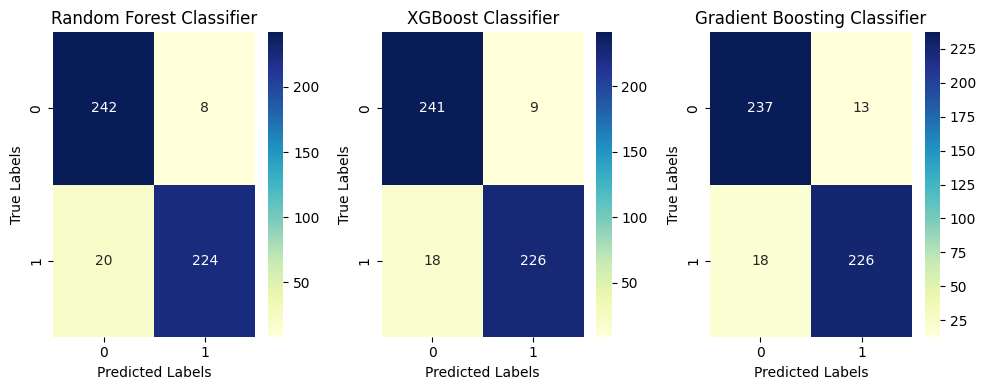

In [77]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xg = confusion_matrix(y_test, y_pred_xg)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Plot Random Forest Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Random Forest Classifier')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot XGBoost Classifier Confusion Matrix
sns.heatmap(cm_xg, annot=True, fmt="d", cmap="YlGnBu", ax=axes[1])
axes[1].set_title('XGBoost Classifier')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

# Plot Gradient Boosting Classifier Confusion Matrix
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="YlGnBu", ax=axes[2])
axes[2].set_title('Gradient Boosting Classifier')
axes[2].set_xlabel('Predicted Labels')
axes[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

### ROC-AUC Curve

In [72]:
# Get predicted probabilities for the positive class
y_prob = best_rf.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Random Forest Classifier:", auc_score)

# Get predicted probabilities for the positive class
y_prob = best_xgb.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of XGBoost Classifier:", auc_score)

# Get predicted probabilities for the positive class
y_prob = best_gb.predict_proba(x_test)[:, 1]
# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score Of Gradient Boosting Classifier:", auc_score)

ROC AUC Score Of Random Forest Classifier: 0.9797131147540984
ROC AUC Score Of XGBoost Classifier: 0.9725737704918033
ROC AUC Score Of Gradient Boosting Classifier: 0.9753442622950819


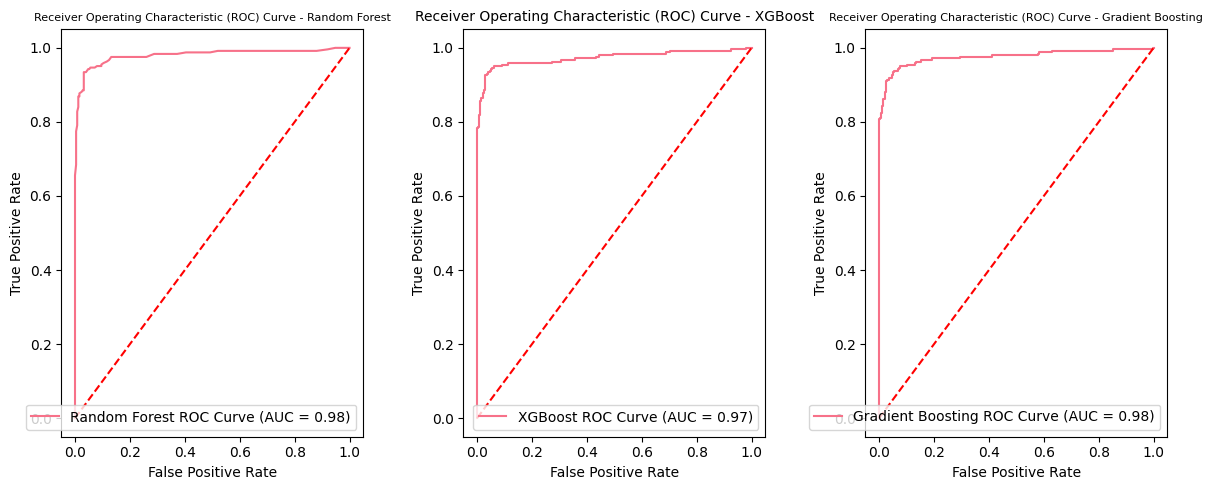

In [76]:
# Get predicted probabilities for the positive class for the classifiers
y_prob_rf = best_rf.predict_proba(x_test)[:, 1]
y_prob_xg = best_xgb.predict_proba(x_test)[:, 1]
y_prob_gb = best_gb.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores for both classifiers
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
auc_score_xg = roc_auc_score(y_test, y_prob_xg)
auc_score_gb = roc_auc_score(y_test, y_prob_gb)

# Calculate ROC curves for both classifiers
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_prob_xg, pos_label=1)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb, pos_label=1)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot ROC curve for Random Forest Classifier
plt.subplot(1, 3, 1)
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC Curve (AUC = {:.2f})'.format(auc_score_rf))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest', fontsize=8)
plt.legend(loc='lower right')

# Plot ROC curve for XGBoost Classifier
plt.subplot(1, 3, 2)
plt.plot(fpr_xg, tpr_xg, label='XGBoost ROC Curve (AUC = {:.2f})'.format(auc_score_xg))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost', fontsize=10)
plt.legend(loc='lower right')

# Plot ROC curve for Gradient Boosting Classifier
plt.subplot(1, 3, 3)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting ROC Curve (AUC = {:.2f})'.format(auc_score_gb))
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting', fontsize=8)
plt.legend(loc='lower right')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### `Observations:`

1. **Random Forest Classifier:**
   - Initial Accuracy: 0.947368
   - Accuracy after Hyperparameter Tuning: 0.9433198380566802
   - ROC AUC Score: 0.9797131147540984

The Random Forest Classifier initially had the highest accuracy among the three models, but after hyperparameter tuning, its accuracy slightly decreased. However, it still maintains a high ROC AUC score, indicating excellent overall performance.
<br>
<br>
2. **Gradient Boosting Classifier:**
   - Initial Accuracy: 0.941296
   - Accuracy after Hyperparameter Tuning: 0.9453441295546559
   - ROC AUC Score: 0.9753442622950819

The Gradient Boosting Classifier had the second highest initial accuracy. After hyperparameter tuning, it improved and surpassed the Random Forest Classifier in terms of accuracy. It also has a strong ROC AUC score, suggesting good predictive capability.
<br>
<br>
3. **XGBoost Classifier:**
   - Initial Accuracy: 0.931174
   - Accuracy after Hyperparameter Tuning: 0.937246963562753
   - ROC AUC Score: 0.9725737704918033

The XGBoost Classifier had the lowest initial accuracy, but after hyperparameter tuning, it exhibited significant improvement. Its ROC AUC score is also quite high, indicating a good ability to discriminate between classes.

**`Insights:`**
In summary, the Random Forest Classifier initially had the highest accuracy and ROC AUC score. However, after hyperparameter tuning, the Gradient Boosting Classifier achieved the highest accuracy and an impressive ROC AUC score. The XGBoost Classifier, while initially the lowest in accuracy, also saw significant improvement after tuning and has a competitive ROC AUC score.

To make the best model selection, if we prioritize high accuracy, the Gradient Boosting Classifier after hyperparameter tuning might be the best choice. If a balance between accuracy and interpretability is needed, the Random Forest Classifier remains a strong model.

### Saving the best model

In [78]:
filename = 'HR_best_model.pkl'
pickle.dump(best_rf, open(filename, 'wb'))